# CRIMSON LIFELINER: A MODEL TO PREDICT A  BLOOD DONOUR

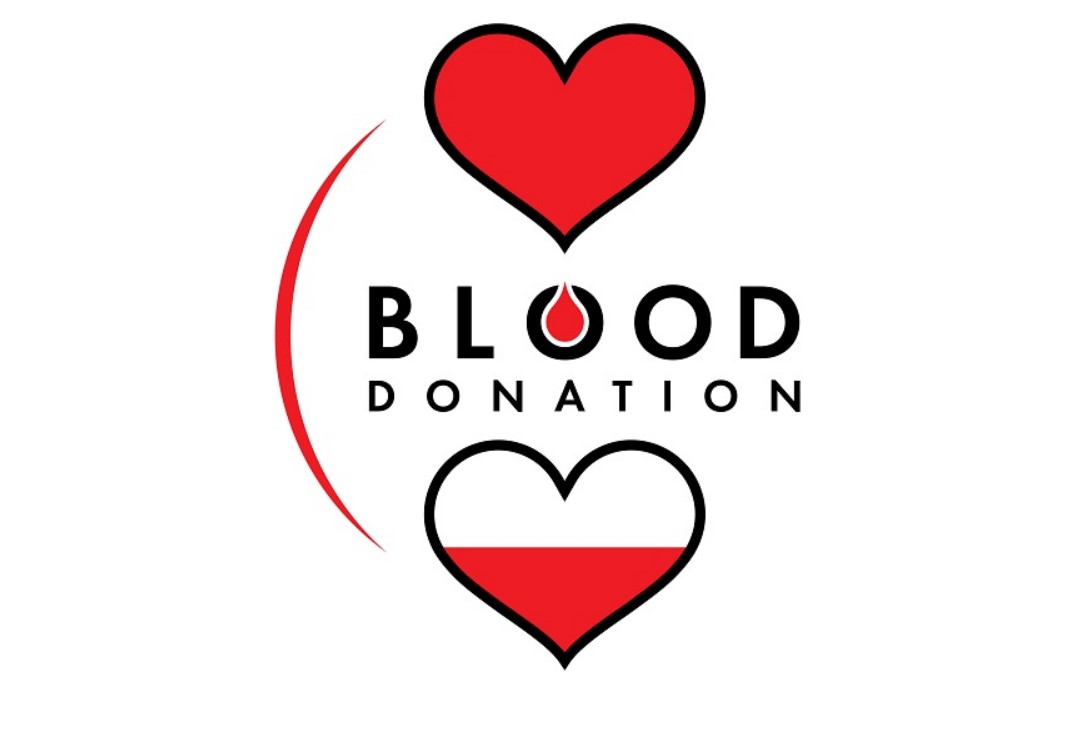

<font color="black"><h3>A PROJECT BY </h3></font>
<font color="red"><h4> Sameeksha & Sampreethi</h4></font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import linear_model
import sklearn

In [2]:
df = pd.read_excel(r"C:\Users\Sampreethi Y\Desktop\6th sem\others\internship\Blood Donor Responses.xlsx","Sheet1")
pd.set_option('display.max_columns', None)


In [3]:
df

Timestamp  DONOUR UID Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49         NaN    19-25  Female             A+ve   
1    7/13/2023 18:25:09         NaN    25-35  Female             B+ve   
2    7/13/2023 18:28:45         NaN    25-35  Female             O-VE   
3    7/13/2023 18:34:21         NaN    25-35  Female             B-ve   
4    7/13/2023 18:34:36         NaN    19-25    Male             O+ve   
..                  ...         ...      ...     ...              ...   
249  7/16/2023 11:33:52         NaN    25-35  Female             B-ve   
250  7/16/2023 12:04:45         NaN      35+    Male             O+ve   
251  7/16/2023 12:39:35         NaN      35+  Female             O+ve   
252  7/16/2023 13:12:35         NaN    19-25  Female             B+ve   
253  7/16/2023 13:24:44         NaN    19-25  Female             A+ve   

    How many times have u donated blood till now?\n  \
0                                       not donated   
1                                       not donated   
2                                       not donated   
3                                       not donated   
4                                       not donated   
..                                              ...   
249                                     not donated   
250                               more than 3 times   
251                                     not donated   
252                                     not donated   
253                                     not donated   

    When did you last donated\nthe blood       Reason You donated  \
0                            not donated  No reason in particular   
1                            not donated  No reason in particular   
2                            not donated  No reason in particular   
3                            not donated  No reason in particular   
4                            not donated  No reason in particular   
..                                   ...                      ...   
249                          not donated  No reason in particular   
250                       a year or more  No reason in particular   
251                          not donated  No reason in particular   
252                          not donated  No reason in particular   
253                          not donated  No reason in particular   

    Do you consume alcohol? Do you Smoke? Do you consume drugs  \
0           I won't consume    not at all                   no   
1           I won't consume    not at all                   no   
2           I won't consume    not at all                   no   
3           I won't consume    not at all                   no   
4           I won't consume    not at all                   no   
..                      ...           ...                  ...   
249         I won't consume    not at all                   no   
250         I won't consume    not at all                   no   
251         I won't consume    not at all                   no   
252         I won't consume    not at all                   no   
253         I won't consume    not at all                   no   

       food profile Do you wish to Donate blood in future?  \
0        vegetarian                                    yes   
1        vegetarian                                    yes   
2    non-vegetarian                                    yes   
3              both                                    yes   
4              both                                    yes   
..              ...                                    ...   
249            both                               not sure   
250      vegetarian                                    yes   
251      vegetarian                                    yes   
252            both                                    yes   
253            both                                    yes   

    when are you planning to donate your blood ?\n Your Weight Your Height  \
0                             m

<font color="red">Since the Donour UID column in the data set is null we later fill it with unique id
 by using  function</font>

In [4]:
#df = df.dropna(axis="columns")

<font color="hotpink">we have incorrect weight values , some cells contain units of measurement as well i.e kg
so to remove that we have defined a function clean_weight which iterates over the entire Your Weight column , if the cell in column has value associated with kg , then it is replaced with its coefficient value  </font>

In [5]:
def cl_w():
    for b in df.index:
        if type(df.loc[b,"Your Weight"]) == str:
            print(b)

In [6]:
cl_w()

33
165


In [7]:
def cl_h():
    for b in df.index:
        if type(df.loc[b,"Your Height"]) == str:
            print(b)

cl_h()

<font color="red">function to check the index at which there is incosistency in the cell value</font>

In [8]:
cl_h()

33
46
91
92
105
109
119
129
130
135
142
147
155
165
169
174
176
195
197
216
224
225


In [9]:

df=df.replace({'Your Weight':'[A-Za-z]','Your Height':'[A-Za-z]'},'',regex=True)


<font color = "red">this above piece of code removes units associated values and replaces that with empty string

In [10]:
cl_h()

33
46
91
92
105
109
119
129
130
135
142
147
155
165
169
174
176
195
197
216
224
225


In [11]:
pd.set_option('display.max_rows',None)

<font color="red">to display every cell value </font>

In [12]:
df['Your Height']

0          156
1          152
2          154
3          154
4          5.9
5          170
6          172
7          176
8          154
9          5.3
10         154
11         5.1
12         160
13         154
14         154
15         178
16         161
17         160
18         151
19         154
20         154
21         154
22         154
23         175
24         176
25         166
26         160
27         162
28         154
29         154
30         5.6
31         154
32         155
33        168 
34         156
35         150
36         154
37         165
38         156
39         154
40         164
41          93
42         154
43         154
44         154
45         154
46         158
47         154
48         154
49         154
50         154
51         154
52         168
53         172
54         154
55         175
56         171
57         180
58         5.6
59         157
60         146
61         172
62         154
63         5.5
64         154
65         157
66        

<font color="red">if there is lesser value in the column due to miss placement of decimal point, then it is handled by the below piece of code</font>

In [13]:
def clear_height():
    list = ["'",'"',",",",,"]
    for h in df.index:
        
        if type(df.loc[h,"Your Height"])==str:
            
            print(df.loc[h,"Your Height"])

In [14]:
clear_height()

168 
158
 
6'0
5'8"
5'8
5.2 
167.64
5,8
190
6 
5 3
6
6
164 
5,3
5'9
5'8"
5 8
5.4'
5 
5 2


In [15]:
df = df.replace({'Your Height':["'",'"',",",",,"]},' ',regex =True)         

In [16]:
df['Your Height'] = df['Your Height'].astype(str).str.replace('.',' ')

C:\Users\Sampreethi Y\AppData\Local\Temp\ipykernel_38044\276370477.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Your Height'] = df['Your Height'].astype(str).str.replace('.',' ')


In [17]:
df['Your Height']

0          156
1          152
2          154
3          154
4          5 9
5          170
6          172
7          176
8          154
9          5 3
10         154
11         5 1
12         160
13         154
14         154
15         178
16         161
17         160
18         151
19         154
20         154
21         154
22         154
23         175
24         176
25         166
26         160
27         162
28         154
29         154
30         5 6
31         154
32         155
33        168 
34         156
35         150
36         154
37         165
38         156
39         154
40         164
41          93
42         154
43         154
44         154
45         154
46         158
47         154
48         154
49         154
50         154
51         154
52         168
53         172
54         154
55         175
56         171
57         180
58         5 6
59         157
60         146
61         172
62         154
63         5 5
64         154
65         157
66        

In [18]:
df['Your Height'] = df['Your Height'].astype(str).str.replace(' ','')

In [19]:
df['Your Height']

0         156
1         152
2         154
3         154
4          59
5         170
6         172
7         176
8         154
9          53
10        154
11         51
12        160
13        154
14        154
15        178
16        161
17        160
18        151
19        154
20        154
21        154
22        154
23        175
24        176
25        166
26        160
27        162
28        154
29        154
30         56
31        154
32        155
33        168
34        156
35        150
36        154
37        165
38        156
39        154
40        164
41         93
42        154
43        154
44        154
45        154
46        158
47        154
48        154
49        154
50        154
51        154
52        168
53        172
54        154
55        175
56        171
57        180
58         56
59        157
60        146
61        172
62        154
63         55
64        154
65        157
66        180
67        162
68        172
69         53
70        170
71    

In [20]:
def correct__height():
    for h in df.index:
        st = df.loc[h,"Your Height"]
                    

        
        if len(df.loc[h,"Your Height"])==1:
            ht = (int(st[0]))*30.48
            ht = round(ht,2)
            ht = str(ht)
            df.loc[h,"Your Height"] = df.loc[h,"Your Height"].replace(st,ht)
            
            
        elif len(df.loc[h,"Your Height"])==2:
            ft = int(st[0])
            inchh = int(st[1])
            ht = (ft*30.48)+(inchh*2.54)
            ht= round(ht,2)
            ht = str(ht)
            df.loc[h,"Your Height"] = df.loc[h,"Your Height"].replace(st,ht)
            
            
        elif len(df.loc[h,"Your Height"])==0:
            ht = 0
            
        
        elif len(df.loc[h,"Your Height"])==3:
            pass
        
        elif len(df.loc[h,"Your Height"])> 3:
            
            ht = st[0:3]
            df.loc[h,"Your Height"] = df.loc[h,"Your Height"].replace(st,ht)
                           
            
            
        

In [21]:
correct__height()

In [22]:
df['Your Height']

0         156
1         152
2         154
3         154
4      175.26
5         170
6         172
7         176
8         154
9      160.02
10        154
11     154.94
12        160
13        154
14        154
15        178
16        161
17        160
18        151
19        154
20        154
21        154
22        154
23        175
24        176
25        166
26        160
27        162
28        154
29        154
30     167.64
31        154
32        155
33        168
34        156
35        150
36        154
37        165
38        156
39        154
40        164
41     281.94
42        154
43        154
44        154
45        154
46        158
47        154
48        154
49        154
50        154
51        154
52        168
53        172
54        154
55        175
56        171
57        180
58     167.64
59        157
60        146
61        172
62        154
63      165.1
64        154
65        157
66        180
67        162
68        172
69     160.02
70        170
71    

In [23]:
df['Your Height'] = pd.to_numeric(df['Your Height'])
df['DONOUR UID'] = df['DONOUR UID'].astype(str)

In [24]:
df.dtypes

Timestamp                                                        object
DONOUR UID                                                       object
Your Age                                                         object
Gender                                                           object
Your Blood Group                                                 object
How many times have u donated blood till now?\n                  object
When did you last donated\nthe blood                             object
Reason You donated                                               object
Do you consume alcohol?                                          object
Do you Smoke?                                                    object
Do you consume drugs                                             object
food profile                                                     object
Do you wish to Donate blood in future?                           object
when are you planning to donate your blood ?\n                  

In [25]:
df['Your Height']

0      156.00
1      152.00
2      154.00
3      154.00
4      175.26
5      170.00
6      172.00
7      176.00
8      154.00
9      160.02
10     154.00
11     154.94
12     160.00
13     154.00
14     154.00
15     178.00
16     161.00
17     160.00
18     151.00
19     154.00
20     154.00
21     154.00
22     154.00
23     175.00
24     176.00
25     166.00
26     160.00
27     162.00
28     154.00
29     154.00
30     167.64
31     154.00
32     155.00
33     168.00
34     156.00
35     150.00
36     154.00
37     165.00
38     156.00
39     154.00
40     164.00
41     281.94
42     154.00
43     154.00
44     154.00
45     154.00
46     158.00
47     154.00
48     154.00
49     154.00
50     154.00
51     154.00
52     168.00
53     172.00
54     154.00
55     175.00
56     171.00
57     180.00
58     167.64
59     157.00
60     146.00
61     172.00
62     154.00
63     165.10
64     154.00
65     157.00
66     180.00
67     162.00
68     172.00
69     160.02
70     170.00
71    

In [26]:
fillerr = df['Your Height'].median()
df['Your Height']= df['Your Height'].fillna(fillerr)

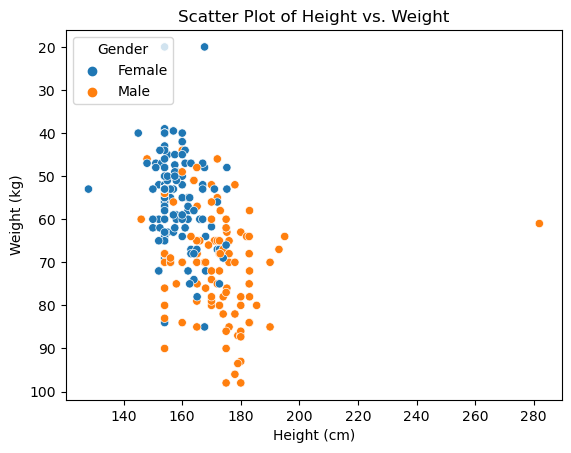

In [27]:
height1 = df['Your Height']
weight1 = df['Your Weight']
genderr = df['Gender']
sns.scatterplot(x=height1, y=weight1,hue=genderr)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Height vs. Weight')
plt.legend(title='Gender', loc='upper left')
plt.show()

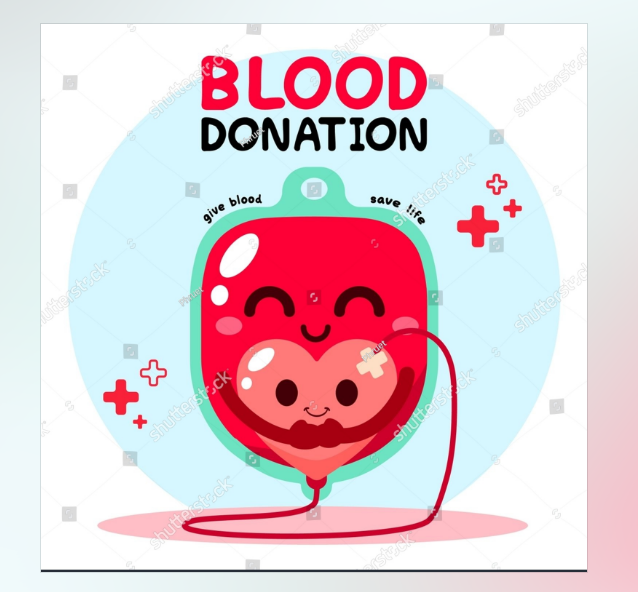

In [28]:
def assign_UserID(aG,gen,bG):
    
    if(aG=="35+" or aG=="50+"):
        
        aG=aG.replace("+"," ")
        
        aG = aG.replace(' ','')
        
    elif(aG=="below 18"):
        aG = aG.replace(aG,"18")
            
    else:
        aG = aG.replace('-'," ")
        
        aG = aG.replace(' ','')
         
        
    if gen=="Male":
        gen = "M"
                
            
    else :
        gen="F"
                
        
    if bG == "A+ve" :
        bG = "A"
        pn = "P"
            
    elif bG == "A-ve" :
        bG = "A"
        pn = "N"
            
    elif bG == "B+ve" :
        bG = "B"
        pn = "P"
            
    elif bG == "B-ve" :
        bG = "B"
        pn = "N"
        
    elif bG == "AB+ve" :
        bG = "AB"
        pn = "P"
        
    elif bG == "AB-ve" :
        bG = "AB"
        pn = "N"
            
    elif bG == "O+ve" :
        bG = "O"
        pn = "P"
        
    else :
        bG= "O"
        pn ="N"
        
    U_DID = aG+bG+pn
        
    return (U_DID)
        


In [29]:
assign_UserID("35+","Female","AB-ve")

'35ABN'

In [30]:
for rt in range(0,254):
    aG = df.loc[rt,'Your Age']
    gen = df.loc[rt,'Gender']
    bG = df.loc[rt,'Your Blood Group']
    ID_unique = assign_UserID(aG,gen,bG)
    df.loc[rt,'DONOUR UID'] = ID_unique + str(rt)

to generate unique ID for the donor we have written above piece of code

In [31]:
df['DONOUR UID']

0         1925AP0
1         2535BP1
2         2535ON2
3         2535BN3
4         1925OP4
5         1925BP5
6           18OP6
7         2535BP7
8         1925AP8
9        1925ABP9
10       2535AP10
11       1925OP11
12         18OP12
13       1925BP13
14       1925BP14
15       1925AP15
16       1925OP16
17         35AP17
18       1925BP18
19       1925BP19
20         35OP20
21         50BP21
22         35AP22
23       1925OP23
24       2535AP24
25         35OP25
26       1925OP26
27       1925OP27
28       1925AP28
29       1925AP29
30      1925ABP30
31       1925OP31
32       1925OP32
33       1925BP33
34         50OP34
35       2535OP35
36       1925OP36
37       1925AP37
38       1925OP38
39       1925OP39
40       2535BP40
41        35ABP41
42       2535OP42
43       2535AP43
44       1925ON44
45       2535BP45
46         35OP46
47       2535OP47
48       1925OP48
49       1925OP49
50       1925AP50
51       1925OP51
52       2535OP52
53       1925AP53
54       1925OP54
55       1

In [32]:
df

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

type cast the data to numeric

In [33]:
df['Your Height'] = pd.to_numeric(df['Your Height'])
df['Your Weight'] = pd.to_numeric(df['Your Weight'])

In [34]:
df.dtypes

Timestamp                                                        object
DONOUR UID                                                       object
Your Age                                                         object
Gender                                                           object
Your Blood Group                                                 object
How many times have u donated blood till now?\n                  object
When did you last donated\nthe blood                             object
Reason You donated                                               object
Do you consume alcohol?                                          object
Do you Smoke?                                                    object
Do you consume drugs                                             object
food profile                                                     object
Do you wish to Donate blood in future?                           object
when are you planning to donate your blood ?\n                  

<font color="green">CALCULATING BMI </font>

In [35]:
for bi in range(0,254):
    
    h_m = df.loc[bi,"Your Height"]*0.01
    h_m2 = h_m*h_m
    
    BM_index =  df.loc[bi,"Your Weight"] / h_m2
    
    df.loc[bi,"BMI value"] = BM_index
    

In [36]:
df['BMI value']

0      22.600263
1      22.506925
2      22.347782
3      21.926126
4      20.510438
5      25.605536
6      25.351541
7      27.440599
8      22.347782
9      15.621094
10     28.672626
11     18.744999
12     23.437500
13     16.444594
14     22.347782
15     16.412069
16     18.132017
17     27.343750
18     20.613131
19     35.419126
20     29.094282
21     29.515939
22     32.045876
23     20.244898
24     22.598140
25     21.773842
26     16.406250
27     22.100290
28     23.612751
29     16.866251
30     30.245699
31     18.131219
32     26.222685
33     25.510204
34     28.763971
35     27.555556
36     20.239501
37     25.711662
38     28.763971
39     22.347782
40     21.564545
41      7.673905
42     34.997470
43     20.239501
44     22.347782
45     22.347782
46     30.043262
47     25.299376
48     22.347782
49      8.433125
50     21.082813
51     23.191095
52     22.675737
53     18.591130
54     25.299376
55     20.244898
56     22.229062
57     28.703704
58     17.0799

<font color="green">weight status</font>

Underweight:   BMI less than 18.5

Normal weight: BMI between 18.5 and 24.9

Overweight:    BMI between 25 and 29.9

Obesity:       BMI of 30 or higher

In [37]:
fillerr = df['BMI value'].median()
df['BMI value']= df['BMI value'].fillna(fillerr)

<font color="green">Number of male and female Respondants</font>

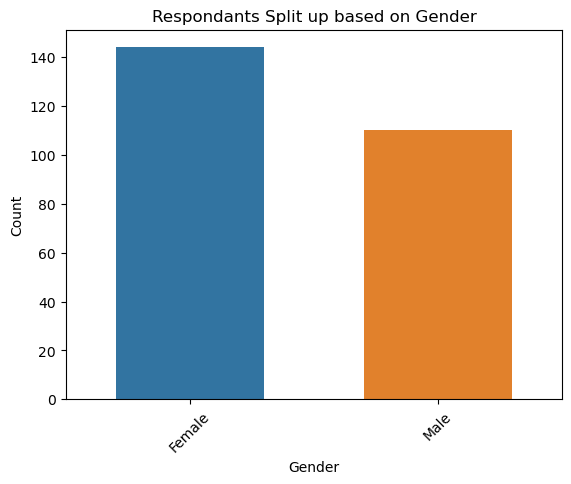

In [38]:
sns.countplot(data=df, x=df['Gender'],width=0.6)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Respondants Split up based on Gender')
plt.xticks(rotation=45)
plt.show()

In [39]:
count_values = df['Gender'].value_counts()
for category, count in count_values.items():
    print(f'{category}: {count}')

Female: 144
Male: 110


In [40]:
def count_bmi():
    Uw_count = 0
    Nw_count = 0
    Ow_count = 0
    Ob_count = 0
    FUw = 0
    MUw = 0
    FNw = 0 
    MNw = 0
    FOw = 0
    MOw = 0
    FOb = 0
    MOb = 0
    for Br in range(0,254):
        
        if df.loc[Br,"BMI value"] <= 18.5:
            #df.loc[Br,""]
            
            Uw_count +=1
            
            if df.loc[Br,"Gender"]=="Male":
                
                MUw +=1
                
            else:
                
                FUw += 1
                
        elif df.loc[Br,"BMI value"] > 18.5 and df.loc[Br,"BMI value"]<=24.9:
            
            Nw_count +=1
            
            if df.loc[Br,"Gender"]=="Male":
                
                MNw +=1
                
            else:
                
                FNw +=1
                
                
        elif df.loc[Br,"BMI value"]>=25 and df.loc[Br,"BMI value"]<=29.9:
            
            Ow_count +=1
            
            if df.loc[Br,"Gender"]=="Male":
                
                MOw +=1
                
            else:
                
                FOw +=1
            
        else:
            
            Ob_count +=1
            
            if df.loc[Br,"Gender"]=="Male":
                
                MOb +=1
                
            else:
                FOb +=1
        
    print("\n")    
    print("Total number of under weight count:",Uw_count)
    print("\n")
    print("Number of Male under weight count:",MUw)
    print("\n")
    print("Number of Female under weight count:",FUw)
    print("\n")
    
    print(".............................................")
    
    print("\n")
    print("Total number of Normal weight count:",Nw_count)
    print("\n")
    print("Number of Male Normal weight count:",MNw)
    print("\n")
    print("Number of Female Normal weight count:",FNw)
    print("\n")
    
    print(".............................................")
    
    print("\n")
    print("Total number of Over weight count:",Ow_count)
    print("\n")
    print("Number of Male Over weight count:",MOw)
    print("\n")
    print("Number of Female Over weight count:",FOw)
    print("\n")
    
    print(".............................................")
    
    print("\n")
    print("Total number of Obese  count:",Ob_count)
    print("\n")
    print("Number of Male Obese count:",MOb)
    print("\n")
    print("Number of Female Obese weight count:",FOb)
    print("\n")
    
    print(".............................................")
    
    return Uw_count,Nw_count,Ow_count,Ob_count,MUw,FUw,MNw,FNw,MOw,FOw,MOb,FOb
    
            

In [41]:
Split_bmi = count_bmi()
print(Split_bmi)



Total number of under weight count: 30


Number of Male under weight count: 9


Number of Female under weight count: 21


.............................................


Total number of Normal weight count: 142


Number of Male Normal weight count: 51


Number of Female Normal weight count: 91


.............................................


Total number of Over weight count: 63


Number of Male Over weight count: 37


Number of Female Over weight count: 26


.............................................


Total number of Obese  count: 19


Number of Male Obese count: 13


Number of Female Obese weight count: 6


.............................................
(30, 142, 63, 19, 9, 21, 51, 91, 37, 26, 13, 6)


In [42]:
Uw_count = Split_bmi[0]
Nw_count = Split_bmi[1]
Ow_count = Split_bmi[2]
Ob_count = Split_bmi[3]
MUw = Split_bmi[4]
FUw = Split_bmi[5]
MNw = Split_bmi[6]
FNw = Split_bmi[7]
MOw = Split_bmi[8]
FOw = Split_bmi[9]
MOb = Split_bmi[10]
FOb = Split_bmi[11]

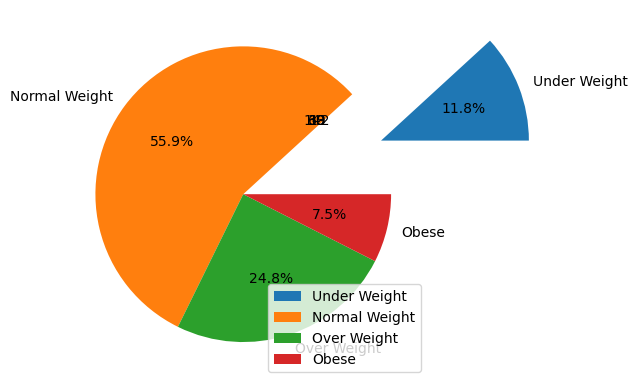

In [43]:
#bmi_array = np.array([8,21,51,91,37,26,14,6])
bmi_array = np.array([Uw_count,Nw_count,Ow_count,Ob_count])
bmi_labels=['Under Weight','Normal Weight','Over Weight','Obese']
bmi_values = [Uw_count,Nw_count,Ow_count,Ob_count]
expl = [1,0,0,0]
plt.pie(bmi_array,labels = bmi_labels, autopct='%1.1f%%', startangle=0,explode=expl)
for i, bmi_values in enumerate(bmi_values):
    plt.text(0.5, 0.5, str(bmi_values), ha='center', va='center')
plt.legend()



Pie Chart representing total respondant's BMI status

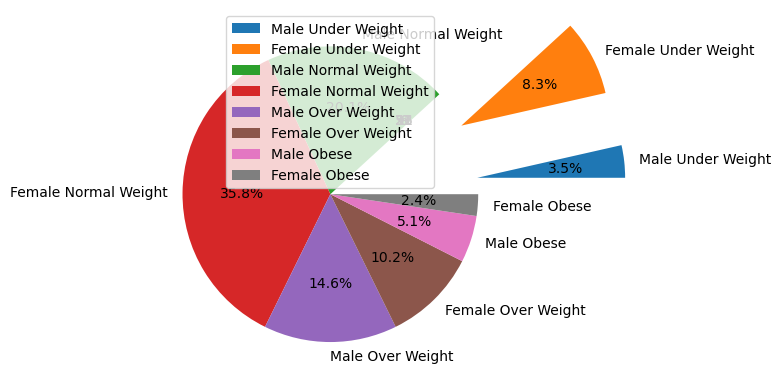

In [44]:
bmi_array2 = np.array([MUw,FUw,MNw,FNw,MOw,FOw,MOb,FOb])
bmi_labels2=['Male Under Weight','Female Under Weight','Male Normal Weight','Female Normal Weight','Male Over Weight','Female Over Weight','Male Obese','Female Obese']
bmi_values2 = [MUw,FUw,MNw,FNw,MOw,FOw,MOb,FOb]
exp = [1,1,0,0,0,0,0,0]
plt.pie(bmi_array2,labels = bmi_labels2,autopct='%1.1f%%', startangle=0,explode=exp)
for i2, bmi_values2 in enumerate(bmi_values2):
    plt.text(0.5, 0.5, str(bmi_values2), ha='center', va='center')


plt.legend()

BMI Split up and classification based on Gender

In [45]:
df['Do you have any Disease?\n'] = df['Do you have any Disease?\n'].replace('no , i am healthy', 'healthy')
df['Do you have any Disease?\n'] = df['Do you have any Disease?\n'].replace('other serious disease, i prefer not to specify', 'OSD')

df['Do you have any Disease?\n']

0                                  hemoglobin deficiency
1                                                healthy
2                                                healthy
3                                                healthy
4                                                healthy
5                                                healthy
6                    allergic towards something specific
7                                                healthy
8             nutrient deficiency, hemoglobin deficiency
9                                                healthy
10                                               healthy
11             Low Blood Pressure, hemoglobin deficiency
12                                               healthy
13            nutrient deficiency, hemoglobin deficiency
14            nutrient deficiency, hemoglobin deficiency
15                                               healthy
16                                   nutrient deficiency
17                             

In [46]:
def disease_or_def(df):
    any_def = ["asthama","Diabetes","High Blood Pressure","Low Blood Pressure","allergic towards something specific","Cancer","obesity","nutrient deficiency","hemoglobin deficiency","OSD","healthy"]
    
    ad_counts = [0] * len(any_def) # to initialise the list with 0 and length equal to length of any_def

    for i in range(0,len(df)):
        
        disease_response = df.loc[i,"Do you have any Disease?\n"]        # to copy the ith row value of Do you have any Disease? column for
        #  matching the disease 
        dr_split = disease_response.split(", ")# disease_response is of type string so, convert that to list

        
        for j, disease in enumerate(any_def):
            
        #This loop iterates over each element of any_def, and j -> the index of the current element,  disease -> the actual disease string of df
            
            #for k , l in enumerate(dr_split):
            for k in range(0,len(dr_split)):
                
                if dr_split[k] == disease:
                    
                    ad_counts[j] += 1
                    
            
    for k in range(len(any_def)):
        
        print(any_def[k],":",ad_counts[k],"\n") #printing the disease with disease count
           
    return ad_counts
    

               

function to determine the count of each disease category in over all respondent

In [47]:
dislist = disease_or_def(df)
print(dislist)

asthama : 5 

Diabetes : 8 

High Blood Pressure : 4 

Low Blood Pressure : 5 

allergic towards something specific : 13 

Cancer : 0 

obesity : 3 

nutrient deficiency : 49 

hemoglobin deficiency : 62 

OSD : 5 

healthy : 155 

[5, 8, 4, 5, 13, 0, 3, 49, 62, 5, 155]


df.loc[236,'Do you have any Disease?\n']

dd = df.loc[236,'Do you have any Disease?\n']

print(type(dd))

dy = dd.split(",")

dy

print(type(dy))

above 6 lines of code was written for the sake of reference

In [48]:
dis_arr = np.array(dislist)

In [49]:
dis_arr

array([  5,   8,   4,   5,  13,   0,   3,  49,  62,   5, 155])

for good appearance we are rearranging the values 

In [50]:
dis_arr2 = np.array([0,8,4,5,5,13,3,49,62,5,155])

In [51]:
dis_labels = ["Cancer","Diabetes","High Blood Pressure","Low Blood Pressure","asthama","allergic towards something specific","obesity","nutrient deficiency","hemoglobin deficiency","OSD","healthy"]

In [52]:
dis_values = dis_arr2

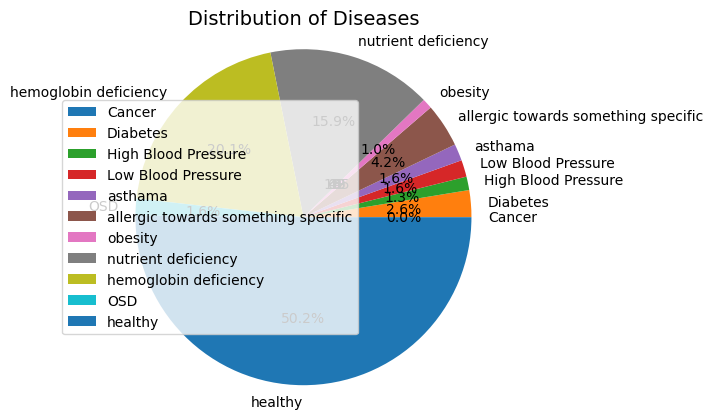

In [53]:

plt.pie(dis_arr2 ,labels= dis_labels,autopct='%1.1f%%', startangle=0 )
for j1, dis_values in enumerate(dis_values):
    plt.text(0.2,0.2,str(dis_values), ha='center', va='center')
    
plt.axis('equal')    
plt.legend(dis_labels, loc='best', fontsize=10)
plt.title("Distribution of Diseases", fontsize=14)
plt.show()


<font color="green">FOR PREDICTING ELIGIBILITY TO DONATE BLOOD, WE HAVE THOUGHT OF CONSIDERING BMI,PRONE TO ANY KIND OF DISEASE AND AGE</font>

<font color="red">If the donour is below 18 years of age , then he is not eligible to donate</font>

<font color="red">If the donour has BMI value which falls under UnderWeight , then he is not eligible to donate</font>

<font color="red">If the donour has Diabetes,High Blood Pressure,Low Blood Pressure,nutrient deficiency, 
    
 <font color="red">hemoglobin deficiency,other serious disease , cancer then he is not eligible to donate</font>

'Your Age','BMI value','Db','HBp','LBp','ND','HeD','OSD','Can','Donor Rating' are the columns we need for building a linear regression model

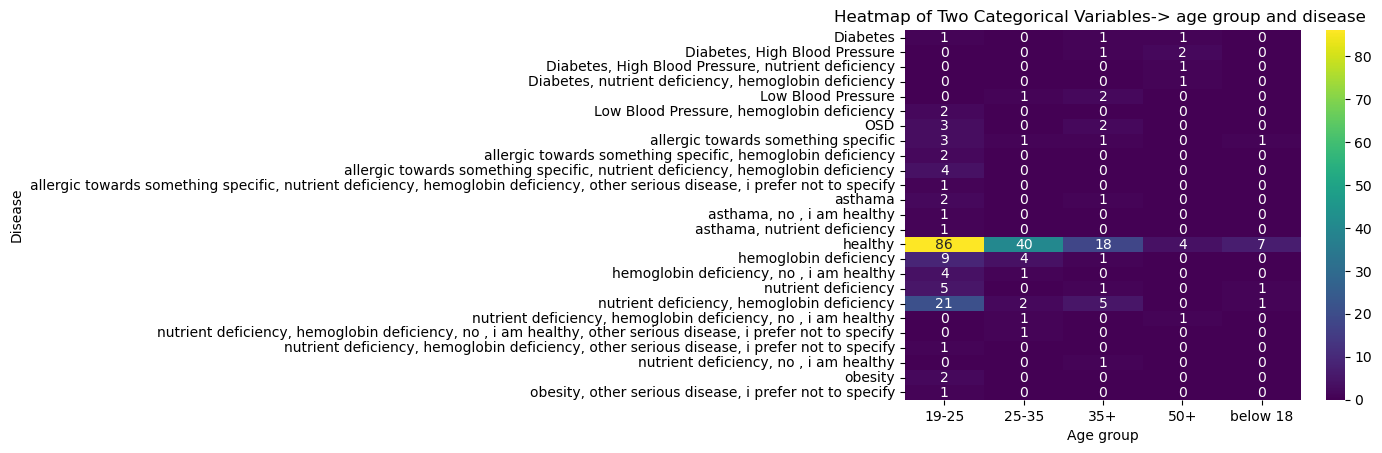

In [54]:
frequency_table = pd.crosstab(df['Do you have any Disease?\n'], df['Your Age'])


sns.heatmap(frequency_table, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Age group')
plt.ylabel('Disease')
plt.title('Heatmap of Two Categorical Variables-> age group and disease ')
plt.show()

<font color="red">Heat Map of Age group vs disease </font>

In [55]:
df

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

In [56]:
def my_fun(df):
    any_def = ["asthama", "Diabetes", "High Blood Pressure", "Low Blood Pressure", "allergic towards something specific", "Cancer", "obesity", "nutrient deficiency", "hemoglobin deficiency", "OSD", "healthy"]

    for i in range(0, 254):
        Disp = df.loc[i, 'Do you have any Disease?\n']
        for j, ds in enumerate(any_def):
            if ds in Disp:
                if ds == "Diabetes":
                    df.loc[i, 'DB'] = 1
                if ds == "High Blood Pressure":
                    df.loc[i, 'HBp'] = 1
                if ds == "Low Blood Pressure":
                    df.loc[i, 'LBp'] = 1
                if ds == "nutrient deficiency":
                    df.loc[i, 'ND'] = 1
                if ds == "hemoglobin deficiency":
                    df.loc[i, 'HeD'] = 1
                if ds == "Cancer":
                    df.loc[i, 'Can'] = 1
                if ds == "OSD":
                    df.loc[i, 'OSD'] = 1
                
                
                    
    return df


In [57]:
my_fun(df)

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

In [58]:
df['DB'] =  df['DB'].fillna(0)
df['HBp'] =  df['HBp'].fillna(0)
df['LBp'] =  df['LBp'].fillna(0)
df['ND'] =  df['ND'].fillna(0)
df['HeD'] =  df['HeD'].fillna(0)
df['OSD'] =  df['OSD'].fillna(0)
df['Can'] =  df['Can'].fillna(0)


<font color="green">we need DONOUR UID,Your Age ,BMI value,DB,	HBp	,LBp,ND,HeD,OSD,Can,Donor Rating to build LR Model</font>

In [59]:
#def fill_DR(df):
df
    

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

In [60]:
def fill_DP(df):
    for i in range(0,254):
        if(df.loc[i,'DB'] == 1 or df.loc[i,'HBp']==1 or df.loc[i,'LBp']==1 or df.loc[i,'ND']==1 or df.loc[i,'HeD']==1 or df.loc[i,'OSD']== 1 or df.loc[i,'Can']==1):
            df.loc[i,'DP'] = 1
            
        else:
            df.loc[i,'DP'] = 0
            
    return df
            


In [61]:
fill_DP(df)

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

In [62]:
def fill_AgePass(df):
    for i in range(0,254):
        if df.loc[i,'Your Age'] =="below 18":
            df.loc[i,'Age Pass'] = 0
        else:
            df.loc[i,'Age Pass'] = 1
    return df   

In [63]:
fill_AgePass(df)

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

In [64]:
def fill_BMIPass(df):
    for i in range(0,254):
        if df.loc[i,'BMI value'] <18.5:
            
            df.loc[i,'BMI Pass'] = 0
        else:
            df.loc[i,'BMI Pass'] = 1
    return df
        

In [65]:
fill_BMIPass(df)

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

In [66]:
def fill_DonourRating(df):
    for i in range(0,254):
        if (df.loc[i,'Age Pass'] == 1 and df.loc[i,'BMI Pass'] == 1 and df.loc[i,'DP'] == 0):
            df.loc[i,'Donor Rating'] = 1
        else:
            df.loc[i,'Donor Rating'] = 0
    return df
            

In [67]:
fill_DonourRating(df)

Timestamp  DONOUR UID  Your Age  Gender Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0     19-25  Female             A+ve   
1    7/13/2023 18:25:09     2535BP1     25-35  Female             B+ve   
2    7/13/2023 18:28:45     2535ON2     25-35  Female             O-VE   
3    7/13/2023 18:34:21     2535BN3     25-35  Female             B-ve   
4    7/13/2023 18:34:36     1925OP4     19-25    Male             O+ve   
5    7/13/2023 18:39:26     1925BP5     19-25    Male             B+ve   
6    7/13/2023 18:40:24       18OP6  below 18    Male             O+ve   
7    7/13/2023 18:41:45     2535BP7     25-35    Male             B+ve   
8    7/13/2023 18:43:47     1925AP8     19-25  Female             A+ve   
9    7/13/2023 18:44:39    1925ABP9     19-25  Female            AB+ve   
10   7/13/2023 18:45:23    2535AP10     25-35  Female             A+ve   
11   7/13/2023 18:46:08    1925OP11     19-25  Female             O+ve   
12   7/13/2023 18:46:09      18OP12  below 18    Male             O+ve   
13   7/13/2023 18:46:56    1925BP13     19-25  Female             B+ve   
14   7/13/2023 18:47:34    1925BP14     19-25  Female             B+ve   
15   7/13/2023 18:48:59    1925AP15     19-25    Male             A+ve   
16   7/13/2023 18:50:34    1925OP16     19-25  Female             O+ve   
17   7/13/2023 18:52:08      35AP17       35+    Male             A+ve   
18   7/13/2023 18:52:26    1925BP18     19-25  Female             B+ve   
19   7/13/2023 18:53:07    1925BP19     19-25  Female             B+ve   
20   7/13/2023 18:55:44      35OP20       35+  Female             O+ve   
21   7/13/2023 18:56:52      50BP21       50+    Male             B+ve   
22   7/13/2023 18:58:18      35AP22       35+    Male             A+ve   
23   7/13/2023 18:58:50    1925OP23     19-25  Female             O+ve   
24   7/13/2023 18:59:22    2535AP24     25-35    Male             A+ve   
25   7/13/2023 19:05:01      35OP25       35+  Female             O+ve   
26   7/13/2023 19:06:07    1925OP26     19-25  Female             O+ve   
27   7/13/2023 19:08:31    1925OP27     19-25  Female             O+ve   
28   7/13/2023 19:09:03    1925AP28     19-25  Female             A+ve   
29   7/13/2023 19:09:08    1925AP29     19-25  Female             A+ve   
30   7/13/2023 19:12:36   1925ABP30     19-25  Female            AB+ve   
31   7/13/2023 19:12:51    1925OP31     19-25  Female             O+ve   
32   7/13/2023 19:14:11    1925OP32     19-25  Female             O+ve   
33   7/13/2023 19:15:51    1925BP33     19-25  Female             B+ve   
34   7/13/2023 19:18:36      50OP34       50+  Female             O+ve   
35   7/13/2023 19:18:52    2535OP35     25-35  Female             O+ve   
36   7/13/2023 19:19:38    1925OP36     19-25  Female             O+ve   
37   7/13/2023 19:21:57    1925AP37     19-25    Male             A+ve   
38   7/13/2023 19:24:30    1925OP38     19-25    Male             O+ve   
39   7/13/2023 19:25:11    1925OP39     19-25    Male             O+ve   
40   7/13/2023 19:29:36    2535BP40     25-35  Female             B+ve   
41   7/13/2023 19:30:56     35ABP41       35+    Male            AB+ve   
42   7/13/2023 19:32:34    2535OP42     25-35    Male             O+ve   
43   7/13/2023 19:34:19    2535AP43     25-35  Female             A+ve   
44   7/13/2023 19:36:47    1925ON44     19-25  Female             O-VE   
45   7/13/2023 19:36:48    2535BP45     25-35  Female             B+ve   
46   7/13/2023 19:37:40      35OP46       35+    Male             O+ve   
47   7/13/2023 19:40:38    2535OP47     25-35  Female             O+ve   
48   7/13/2023 19:41:09    1925OP48     19-25  Female             O+ve   
49   7/13/2023 19:42:47    1925OP49     19-25  Female             O+ve   
50   7/13/2023 19:42:49    1925AP50     19-25  Female             A+ve   
51   7/13/2023 19:43:09    1925OP51     19-25  Female             O+ve   
52   7/13/2023 19:43:37    2535OP52     25-35  Female             O+ve   
53   7/13/2023 19:

create a new data frame consisting of only required columns

In [68]:
selected_columns = ['Age Pass','BMI Pass','DP','Donor Rating']
new_df = df[selected_columns].copy()

In [69]:
new_df

Age Pass  BMI Pass   DP  Donor Rating
0         1.0       1.0  1.0           0.0
1         1.0       1.0  0.0           1.0
2         1.0       1.0  0.0           1.0
3         1.0       1.0  0.0           1.0
4         1.0       1.0  0.0           1.0
5         1.0       1.0  0.0           1.0
6         0.0       1.0  0.0           0.0
7         1.0       1.0  0.0           1.0
8         1.0       1.0  1.0           0.0
9         1.0       0.0  0.0           0.0
10        1.0       1.0  0.0           1.0
11        1.0       1.0  1.0           0.0
12        0.0       1.0  0.0           0.0
13        1.0       0.0  1.0           0.0
14        1.0       1.0  1.0           0.0
15        1.0       0.0  0.0           0.0
16        1.0       0.0  1.0           0.0
17        1.0       1.0  0.0           1.0
18        1.0       1.0  1.0           0.0
19        1.0       1.0  1.0           0.0
20        1.0       1.0  0.0           1.0
21        1.0       1.0  1.0           0.0
22        1.0       1.0  1.0           0.0
23        1.0       1.0  1.0           0.0
24        1.0       1.0  1.0           0.0
25        1.0       1.0  1.0           0.0
26        1.0       0.0  1.0           0.0
27        1.0       1.0  1.0           0.0
28        1.0       1.0  0.0           1.0
29        1.0       0.0  0.0           0.0
30        1.0       1.0  1.0           0.0
31        1.0       0.0  1.0           0.0
32        1.0       1.0  1.0           0.0
33        1.0       1.0  0.0           1.0
34        1.0       1.0  1.0           0.0
35        1.0       1.0  0.0           1.0
36        1.0       1.0  1.0           0.0
37        1.0       1.0  0.0           1.0
38        1.0       1.0  0.0           1.0
39        1.0       1.0  1.0           0.0
40        1.0       1.0  0.0           1.0
41        1.0       0.0  0.0           0.0
42        1.0       1.0  0.0           1.0
43        1.0       1.0  0.0           1.0
44        1.0       1.0  1.0           0.0
45        1.0       1.0  0.0           1.0
46        1.0       1.0  0.0           1.0
47        1.0       1.0  0.0           1.0
48        1.0       1.0  0.0           1.0
49        1.0       0.0  0.0           0.0
50        1.0       1.0  1.0           0.0
51        1.0       1.0  0.0           1.0
52        1.0       1.0  1.0           0.0
53        1.0       1.0  1.0           0.0
54        1.0       1.0  0.0           1.0
55        1.0       1.0  0.0           1.0
56        1.0       1.0  0.0           1.0
57        1.0       1.0  1.0           0.0
58        1.0       0.0  0.0           0.0
59        1.0       1.0  0.0           1.0
60        1.0       1.0  0.0           1.0
61        1.0       0.0  0.0           0.0
62        0.0       1.0  1.0           0.0
63        1.0       1.0  0.0           1.0
64        1.0       1.0  0.0           1.0
65        1.0       1.0  0.0           1.0
66        1.0       1.0  1.0           0.0
67        1.0       1.0  0.0           1.0
68        1.0       1.0  0.0           1.0
69        1.0       1.0  0.0           1.0
70        1.0       1.0  0.0           1.0
71        1.0       1.0  0.0           1.0
72        1.0       1.0  1.0           0.0
73        1.0       1.0  0.0           1.0
74        1.0       1.0  0.0           1.0
75        1.0       1.0  1.0           0.0
76        1.0       1.0  0.0           1.0
77        1.0       1.0  0.0           1.0
78        1.0       1.0  1.0           0.0
79        1.0       1.0  1.0           0.0
80        1.0       1.0  0.0           1.0
81        1.0       1.0  0.0           1.0
82        1.0       1.0  1.0           0.0
83        1.0       1.0  0.0           1.0
84        1.0       1.0  0.0           1.0
85        1.0       1.0  1.0           0.0
86        1.0       1.0  0.0           1.0
87        1.0       0.0  0.0           0.0
88        1.0       1.0  1.0           0.0
89        1.0       1.0  0.0           1.0
90        1.0       1.0  1.0           0.0
91        1.0       0.0  0.0           0.0
92    

In [70]:
#drop the dependent column->
independent_df = new_df.drop('Donor Rating',axis="columns")

In [71]:
independent_df

Age Pass  BMI Pass   DP
0         1.0       1.0  1.0
1         1.0       1.0  0.0
2         1.0       1.0  0.0
3         1.0       1.0  0.0
4         1.0       1.0  0.0
5         1.0       1.0  0.0
6         0.0       1.0  0.0
7         1.0       1.0  0.0
8         1.0       1.0  1.0
9         1.0       0.0  0.0
10        1.0       1.0  0.0
11        1.0       1.0  1.0
12        0.0       1.0  0.0
13        1.0       0.0  1.0
14        1.0       1.0  1.0
15        1.0       0.0  0.0
16        1.0       0.0  1.0
17        1.0       1.0  0.0
18        1.0       1.0  1.0
19        1.0       1.0  1.0
20        1.0       1.0  0.0
21        1.0       1.0  1.0
22        1.0       1.0  1.0
23        1.0       1.0  1.0
24        1.0       1.0  1.0
25        1.0       1.0  1.0
26        1.0       0.0  1.0
27        1.0       1.0  1.0
28        1.0       1.0  0.0
29        1.0       0.0  0.0
30        1.0       1.0  1.0
31        1.0       0.0  1.0
32        1.0       1.0  1.0
33        1.0       1.0  0.0
34        1.0       1.0  1.0
35        1.0       1.0  0.0
36        1.0       1.0  1.0
37        1.0       1.0  0.0
38        1.0       1.0  0.0
39        1.0       1.0  1.0
40        1.0       1.0  0.0
41        1.0       0.0  0.0
42        1.0       1.0  0.0
43        1.0       1.0  0.0
44        1.0       1.0  1.0
45        1.0       1.0  0.0
46        1.0       1.0  0.0
47        1.0       1.0  0.0
48        1.0       1.0  0.0
49        1.0       0.0  0.0
50        1.0       1.0  1.0
51        1.0       1.0  0.0
52        1.0       1.0  1.0
53        1.0       1.0  1.0
54        1.0       1.0  0.0
55        1.0       1.0  0.0
56        1.0       1.0  0.0
57        1.0       1.0  1.0
58        1.0       0.0  0.0
59        1.0       1.0  0.0
60        1.0       1.0  0.0
61        1.0       0.0  0.0
62        0.0       1.0  1.0
63        1.0       1.0  0.0
64        1.0       1.0  0.0
65        1.0       1.0  0.0
66        1.0       1.0  1.0
67        1.0       1.0  0.0
68        1.0       1.0  0.0
69        1.0       1.0  0.0
70        1.0       1.0  0.0
71        1.0       1.0  0.0
72        1.0       1.0  1.0
73        1.0       1.0  0.0
74        1.0       1.0  0.0
75        1.0       1.0  1.0
76        1.0       1.0  0.0
77        1.0       1.0  0.0
78        1.0       1.0  1.0
79        1.0       1.0  1.0
80        1.0       1.0  0.0
81        1.0       1.0  0.0
82        1.0       1.0  1.0
83        1.0       1.0  0.0
84        1.0       1.0  0.0
85        1.0       1.0  1.0
86        1.0       1.0  0.0
87        1.0       0.0  0.0
88        1.0       1.0  1.0
89        1.0       1.0  0.0
90        1.0       1.0  1.0
91        1.0       0.0  0.0
92        1.0       1.0  0.0
93        1.0       1.0  0.0
94        1.0       1.0  0.0
95        1.0       1.0  1.0
96        1.0       1.0  0.0
97        1.0       1.0  1.0
98        1.0       1.0  1.0
99        1.0       1.0  1.0
100       1.0       0.0  0.0
101       1.0       1.0  0.0
102       1.0       1.0  1.0
103       1.0       1.0  0.0
104       1.0       1.0  1.0
105       1.0       1.0  1.0
106       1.0       1.0  1.0
107       1.0       1.0  1.0
108       1.0       1.0  0.0
109       1.0       1.0  0.0
110       1.0       1.0  1.0
111       1.0       1.0  0.0
112       1.0       1.0  0.0
113       1.0       1.0  0.0
114       1.0       1.0  0.0
115       1.0       1.0  0.0
116       1.0       1.0  0.0
117       1.0       1.0  1.0
118       1.0       0.0  1.0
119       1.0       1.0  0.0
120       1.0       1.0  0.0
121       1.0       1.0  0.0
122       1.0       1.0  0.0
123       1.0       1.0  0.0
124       1.0       1.0  0.0
125       1.0       1.0  0.0
126       1.0       1.0  0.0
127       1.0       1.0  0.0
128       1.0       1.0  0.0
129       1.0       1.0  0.0
130       1.0       1.0  0.0
131       1.0       1.0  0.0
132       1.0       1.0  0.0
133       1.0       1.0  1.0
134       1.0       1.0  1.0
135       1.0       1.0  0.0
136       1.0       1.0  0.0
137

In [72]:
from sklearn.linear_model import LogisticRegression
import numpy as np
logreg = LogisticRegression()
dependent_df = new_df['Donor Rating'] 

In [73]:
logreg.fit(independent_df, dependent_df)

LogisticRegression()

In [74]:
logreg.coef_

array([[ 2.69213744,  3.68433361, -5.05931068]])

In [75]:
logreg.intercept_

array([-3.92000352])

In [76]:
logreg.predict([[1,1,0]])

C:\Users\Sampreethi Y\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [77]:
import joblib
joblib.dump(logreg,'Rmodel_joblib')

['Rmodel_joblib']

For train and test

In [78]:
X =  independent_df
y = new_df['Donor Rating']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3)

In [80]:
X_train

Age Pass  BMI Pass   DP
150       1.0       1.0  0.0
213       1.0       1.0  1.0
34        1.0       1.0  1.0
27        1.0       1.0  1.0
211       1.0       1.0  0.0
74        1.0       1.0  0.0
33        1.0       1.0  0.0
76        1.0       1.0  0.0
222       1.0       1.0  0.0
178       1.0       1.0  1.0
182       1.0       1.0  1.0
102       1.0       1.0  1.0
52        1.0       1.0  1.0
175       0.0       0.0  1.0
96        1.0       1.0  0.0
100       1.0       0.0  0.0
125       1.0       1.0  0.0
246       1.0       1.0  0.0
180       1.0       1.0  0.0
239       1.0       1.0  0.0
49        1.0       0.0  0.0
149       1.0       0.0  0.0
19        1.0       1.0  1.0
192       1.0       1.0  0.0
99        1.0       1.0  1.0
114       1.0       1.0  0.0
224       1.0       1.0  0.0
157       1.0       1.0  0.0
21        1.0       1.0  1.0
83        1.0       1.0  0.0
122       1.0       1.0  0.0
14        1.0       1.0  1.0
230       1.0       1.0  0.0
203       1.0       1.0  0.0
155       1.0       1.0  0.0
94        1.0       1.0  0.0
104       1.0       1.0  1.0
93        1.0       1.0  0.0
71        1.0       1.0  0.0
118       1.0       0.0  1.0
161       1.0       1.0  0.0
32        1.0       1.0  1.0
6         0.0       1.0  0.0
154       1.0       1.0  0.0
24        1.0       1.0  1.0
228       1.0       0.0  1.0
128       1.0       1.0  0.0
158       1.0       1.0  0.0
79        1.0       1.0  1.0
216       1.0       1.0  0.0
36        1.0       1.0  1.0
208       1.0       1.0  0.0
15        1.0       0.0  0.0
250       1.0       1.0  1.0
167       1.0       1.0  0.0
164       1.0       1.0  0.0
218       1.0       1.0  0.0
162       1.0       1.0  0.0
116       1.0       1.0  0.0
206       1.0       1.0  1.0
3         1.0       1.0  0.0
152       1.0       1.0  1.0
151       1.0       1.0  0.0
236       1.0       1.0  1.0
181       1.0       1.0  0.0
229       1.0       1.0  1.0
205       1.0       1.0  1.0
10        1.0       1.0  0.0
1         1.0       1.0  0.0
72        1.0       1.0  1.0
48        1.0       1.0  0.0
97        1.0       1.0  1.0
127       1.0       1.0  0.0
143       1.0       1.0  0.0
62        0.0       1.0  1.0
22        1.0       1.0  1.0
8         1.0       1.0  1.0
50        1.0       1.0  1.0
101       1.0       1.0  0.0
134       1.0       1.0  1.0
132       1.0       1.0  0.0
209       1.0       1.0  1.0
35        1.0       1.0  0.0
103       1.0       1.0  0.0
195       1.0       1.0  0.0
185       1.0       1.0  0.0
47        1.0       1.0  0.0
141       1.0       1.0  0.0
244       1.0       1.0  0.0
160       1.0       1.0  0.0
77        1.0       1.0  0.0
238       1.0       1.0  1.0
78        1.0       1.0  1.0
65        1.0       1.0  0.0
135       1.0       1.0  0.0
131       1.0       1.0  0.0
66        1.0       1.0  1.0
44        1.0       1.0  1.0
56        1.0       1.0  0.0
163       1.0       1.0  0.0
177       1.0       1.0  1.0
59        1.0       1.0  0.0
210       1.0       1.0  0.0
98        1.0       1.0  1.0
106       1.0       1.0  1.0
31        1.0       0.0  1.0
129       1.0       1.0  0.0
60        1.0       1.0  0.0
54        1.0       1.0  0.0
111       1.0       1.0  0.0
183       1.0       1.0  1.0
12        0.0       1.0  0.0
45        1.0       1.0  0.0
156       1.0       0.0  1.0
207       1.0       1.0  0.0
70        1.0       1.0  0.0
46        1.0       1.0  0.0
115       1.0       1.0  0.0
42        1.0       1.0  0.0
202       1.0       1.0  0.0
105       1.0       1.0  1.0
53        1.0       1.0  1.0
89        1.0       1.0  0.0
67        1.0       1.0  0.0
13        1.0       0.0  1.0
242       1.0       1.0  0.0
226       1.0       1.0  1.0
121       1.0       1.0  0.0
75        1.0       1.0  1.0
23        1.0       1.0  1.0
38        1.0       1.0  0.0
232       1.0       1.0  1.0
173       0.0       1.0  0.0
17        1.0       1.0  0.0
241       0.0       1.0  0.0
81        1.0       1.0  0.0
4         1.0       1.0  0.0
110

In [81]:
X_test

Age Pass  BMI Pass   DP
137       1.0       0.0  0.0
11        1.0       1.0  1.0
2         1.0       1.0  0.0
225       1.0       1.0  1.0
51        1.0       1.0  0.0
5         1.0       1.0  0.0
217       1.0       1.0  1.0
139       1.0       1.0  1.0
174       0.0       1.0  0.0
240       1.0       1.0  0.0
86        1.0       1.0  0.0
159       1.0       1.0  0.0
147       1.0       1.0  0.0
194       1.0       0.0  1.0
190       1.0       1.0  0.0
138       1.0       1.0  0.0
165       1.0       1.0  0.0
171       1.0       0.0  0.0
92        1.0       1.0  0.0
220       1.0       1.0  0.0
84        1.0       1.0  0.0
85        1.0       1.0  1.0
227       1.0       1.0  0.0
248       1.0       1.0  0.0
16        1.0       0.0  1.0
18        1.0       1.0  1.0
117       1.0       1.0  1.0
41        1.0       0.0  0.0
126       1.0       1.0  0.0
40        1.0       1.0  0.0
140       1.0       1.0  1.0
112       1.0       1.0  0.0
223       1.0       1.0  0.0
234       1.0       1.0  0.0
186       1.0       1.0  0.0
249       1.0       1.0  1.0
87        1.0       0.0  0.0
200       1.0       1.0  1.0
184       1.0       1.0  1.0
172       1.0       1.0  0.0
69        1.0       1.0  0.0
109       1.0       1.0  0.0
55        1.0       1.0  0.0
197       1.0       1.0  0.0
91        1.0       0.0  0.0
133       1.0       1.0  1.0
25        1.0       1.0  1.0
29        1.0       0.0  0.0
237       0.0       0.0  0.0
221       1.0       1.0  0.0
170       0.0       1.0  0.0
58        1.0       0.0  0.0
39        1.0       1.0  1.0
212       1.0       0.0  1.0
68        1.0       1.0  0.0
198       1.0       1.0  0.0
251       1.0       1.0  0.0
168       1.0       1.0  0.0
20        1.0       1.0  0.0
247       1.0       1.0  0.0
146       1.0       1.0  1.0
153       1.0       1.0  0.0
7         1.0       1.0  0.0
119       1.0       1.0  0.0
0         1.0       1.0  1.0
63        1.0       1.0  0.0
215       1.0       1.0  0.0
73        1.0       1.0  0.0
26        1.0       0.0  1.0
61        1.0       0.0  0.0
169       1.0       1.0  0.0
187       1.0       1.0  1.0
30        1.0       1.0  1.0
9         1.0       0.0  0.0
219       1.0       0.0  0.0
113       1.0       1.0  0.0
148       1.0       1.0  0.0

In [82]:
y_train

150    1.0
213    0.0
34     0.0
27     0.0
211    1.0
74     1.0
33     1.0
76     1.0
222    1.0
178    0.0
182    0.0
102    0.0
52     0.0
175    0.0
96     1.0
100    0.0
125    1.0
246    1.0
180    1.0
239    1.0
49     0.0
149    0.0
19     0.0
192    1.0
99     0.0
114    1.0
224    1.0
157    1.0
21     0.0
83     1.0
122    1.0
14     0.0
230    1.0
203    1.0
155    1.0
94     1.0
104    0.0
93     1.0
71     1.0
118    0.0
161    1.0
32     0.0
6      0.0
154    1.0
24     0.0
228    0.0
128    1.0
158    1.0
79     0.0
216    1.0
36     0.0
208    1.0
15     0.0
250    0.0
167    1.0
164    1.0
218    1.0
162    1.0
116    1.0
206    0.0
3      1.0
152    0.0
151    1.0
236    0.0
181    1.0
229    0.0
205    0.0
10     1.0
1      1.0
72     0.0
48     1.0
97     0.0
127    1.0
143    1.0
62     0.0
22     0.0
8      0.0
50     0.0
101    1.0
134    0.0
132    1.0
209    0.0
35     1.0
103    1.0
195    1.0
185    1.0
47     1.0
141    1.0
244    1.0
160    1.0
77     1.0

In [83]:
y_test

137    0.0
11     0.0
2      1.0
225    0.0
51     1.0
5      1.0
217    0.0
139    0.0
174    0.0
240    1.0
86     1.0
159    1.0
147    1.0
194    0.0
190    1.0
138    1.0
165    1.0
171    0.0
92     1.0
220    1.0
84     1.0
85     0.0
227    1.0
248    1.0
16     0.0
18     0.0
117    0.0
41     0.0
126    1.0
40     1.0
140    0.0
112    1.0
223    1.0
234    1.0
186    1.0
249    0.0
87     0.0
200    0.0
184    0.0
172    1.0
69     1.0
109    1.0
55     1.0
197    1.0
91     0.0
133    0.0
25     0.0
29     0.0
237    0.0
221    1.0
170    0.0
58     0.0
39     0.0
212    0.0
68     1.0
198    1.0
251    1.0
168    1.0
20     1.0
247    1.0
146    0.0
153    1.0
7      1.0
119    1.0
0      0.0
63     1.0
215    1.0
73     1.0
26     0.0
61     0.0
169    1.0
187    0.0
30     0.0
9      0.0
219    0.0
113    1.0
148    1.0
Name: Donor Rating, dtype: float64

In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [85]:
X_test

Age Pass  BMI Pass   DP
137       1.0       0.0  0.0
11        1.0       1.0  1.0
2         1.0       1.0  0.0
225       1.0       1.0  1.0
51        1.0       1.0  0.0
5         1.0       1.0  0.0
217       1.0       1.0  1.0
139       1.0       1.0  1.0
174       0.0       1.0  0.0
240       1.0       1.0  0.0
86        1.0       1.0  0.0
159       1.0       1.0  0.0
147       1.0       1.0  0.0
194       1.0       0.0  1.0
190       1.0       1.0  0.0
138       1.0       1.0  0.0
165       1.0       1.0  0.0
171       1.0       0.0  0.0
92        1.0       1.0  0.0
220       1.0       1.0  0.0
84        1.0       1.0  0.0
85        1.0       1.0  1.0
227       1.0       1.0  0.0
248       1.0       1.0  0.0
16        1.0       0.0  1.0
18        1.0       1.0  1.0
117       1.0       1.0  1.0
41        1.0       0.0  0.0
126       1.0       1.0  0.0
40        1.0       1.0  0.0
140       1.0       1.0  1.0
112       1.0       1.0  0.0
223       1.0       1.0  0.0
234       1.0       1.0  0.0
186       1.0       1.0  0.0
249       1.0       1.0  1.0
87        1.0       0.0  0.0
200       1.0       1.0  1.0
184       1.0       1.0  1.0
172       1.0       1.0  0.0
69        1.0       1.0  0.0
109       1.0       1.0  0.0
55        1.0       1.0  0.0
197       1.0       1.0  0.0
91        1.0       0.0  0.0
133       1.0       1.0  1.0
25        1.0       1.0  1.0
29        1.0       0.0  0.0
237       0.0       0.0  0.0
221       1.0       1.0  0.0
170       0.0       1.0  0.0
58        1.0       0.0  0.0
39        1.0       1.0  1.0
212       1.0       0.0  1.0
68        1.0       1.0  0.0
198       1.0       1.0  0.0
251       1.0       1.0  0.0
168       1.0       1.0  0.0
20        1.0       1.0  0.0
247       1.0       1.0  0.0
146       1.0       1.0  1.0
153       1.0       1.0  0.0
7         1.0       1.0  0.0
119       1.0       1.0  0.0
0         1.0       1.0  1.0
63        1.0       1.0  0.0
215       1.0       1.0  0.0
73        1.0       1.0  0.0
26        1.0       0.0  1.0
61        1.0       0.0  0.0
169       1.0       1.0  0.0
187       1.0       1.0  1.0
30        1.0       1.0  1.0
9         1.0       0.0  0.0
219       1.0       0.0  0.0
113       1.0       1.0  0.0
148       1.0       1.0  0.0

In [86]:
logreg.predict(X_test)

array([0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1.])

In [87]:
logreg.score(X_test,y_test)

0.974025974025974

In [88]:
predicted_labels = logreg.predict(X_test)

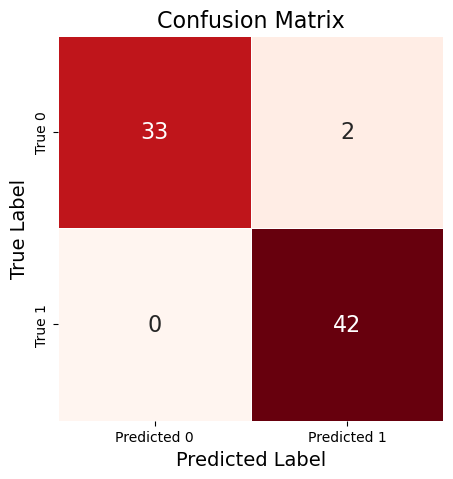

In [89]:
from sklearn.metrics import confusion_matrix
threshold = 0.9 
predicted_labels = np.where(predicted_labels >= threshold, 1, 0)


cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 16}, linewidths=0.5, square=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()



True Negative (TN) => row 1 column 1: The number of correctly predicted non-blood donors.

False Positive (FP) = row 1 column 2: The number of misclassified blood donors (predicted as donors, but actually non-donors).

False Negative (FN) = row 2 column 1: The number of misclassified non-blood donors (predicted as non-donors, but actually donors).

True Positive (TP) = row 2 column 2: The number of correctly predicted blood donors.

this indicates our model has good accuracy

<font color="green"><h3>TRAINING AND TESTING OF DATA IS DONE WITH ABOVE PIECE OF CODE</h3></font>

<font color ="Red"><h3>DECISION TREE CLASSIFIER IS IMPLEMENTED FOR THE SAME PURPOSE BELOW</h3></font>

In [90]:
X3 =independent_df
y3 = dependent_df

# Split the data into 70% training and 30% test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree Classifier
dtf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dtf.fit(X3_train, y3_train)

from sklearn.metrics import accuracy_score, classification_report


y3_pred = dtf.predict(X3_test)


accuracy = accuracy_score(y3_test, y3_pred)

print("Accuracy:", accuracy)


print(classification_report(y3_test, y3_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        47

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



<font color="Red">SECOND PART OF THE PROJECT IS TO FIND THE MATCH FOR THE RECIPIENT</font>

In [91]:
df.nunique() #this function gives number of  unique element in the columns

Timestamp                                                       253
DONOUR UID                                                      254
Your Age                                                          5
Gender                                                            2
Your Blood Group                                                  8
How many times have u donated blood till now?\n                   4
When did you last donated\nthe blood                              6
Reason You donated                                                4
Do you consume alcohol?                                           3
Do you Smoke?                                                     3
Do you consume drugs                                              1
food profile                                                      3
Do you wish to Donate blood in future?                            3
when are you planning to donate your blood ?\n                    3
Your Weight                                     

<font color="green"><h3>to match the donour, we define some criteria</h3></font>


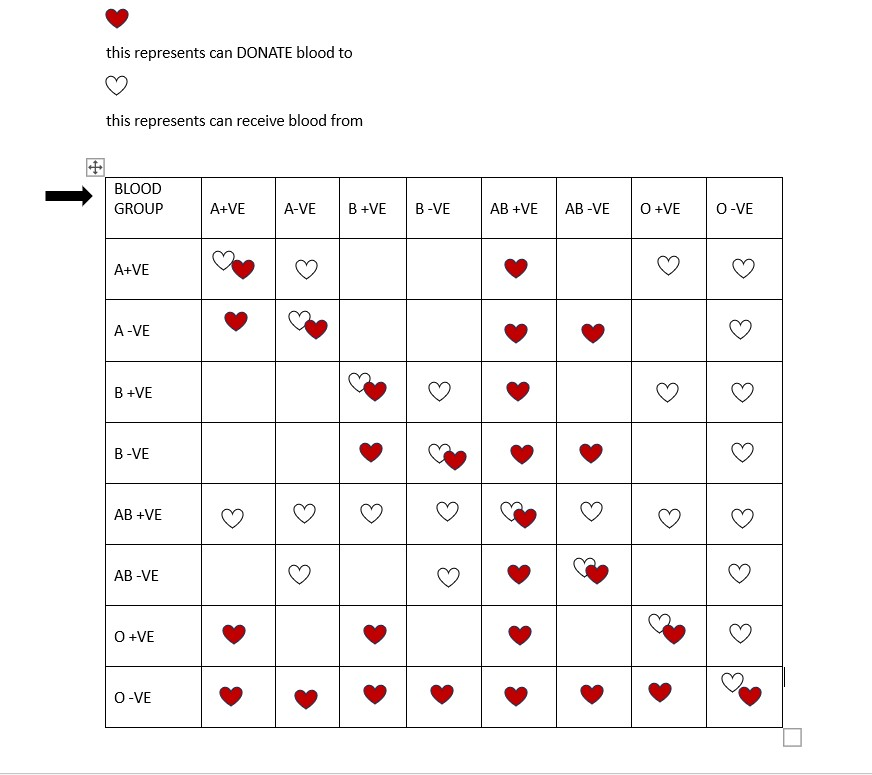

<font color="red"><h3>We have generated unique id for each donour in the dataset with the help of a function we defined earlier,</h3></font>
    
   <font color="red"><h3>with the help of UID we will try to find a match</h3></font>

def find_donour(df,RBg):
    match_list = []
    for i in range(0,254):
        if RBg == df.loc[i,'Your Blood Group']:
            
            
            
            
        
        
        
    
    

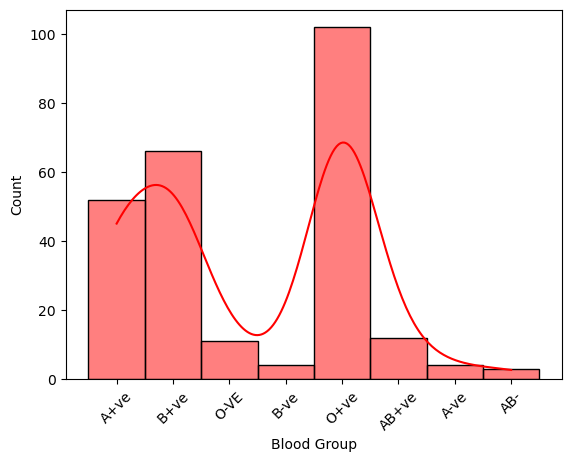

In [92]:
sns.histplot(df["Your Blood Group"],color='red',kde =True)
plt.xlabel("Blood Group")
plt.xticks(rotation=45)
plt.show()

<h4>Distribution of different blood groups from the responses recieved</h4>

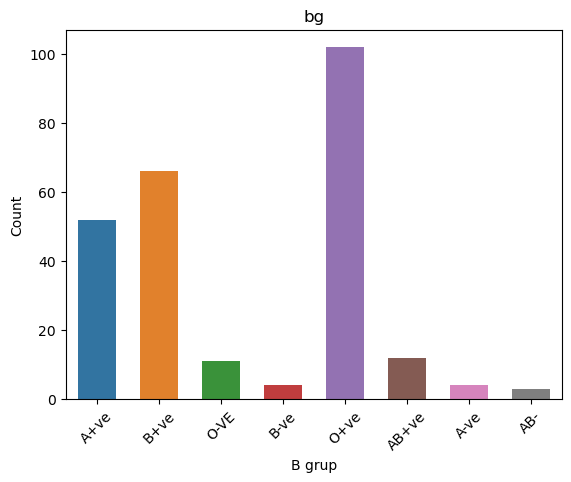

In [93]:
#count plot for the same
sns.countplot(data=df, x=df['Your Blood Group'],width=0.6)
plt.xlabel('B grup')
plt.ylabel('Count')
plt.title('bg')
plt.xticks(rotation=45)
plt.show()



In [94]:
count_gvalues = df['Your Blood Group'].value_counts()
for category, count in count_gvalues.items():
    print(f'{category}: {count}')

O+ve: 102
B+ve: 66
A+ve: 52
AB+ve: 12
O-VE: 11
B-ve: 4
A-ve: 4
AB-: 3


In [95]:

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder



oldname = df['Your Blood Group'].unique()

print(oldname)

label_encoder = preprocessing.LabelEncoder()


df['Your Blood Group']= label_encoder.fit_transform(df['Your Blood Group'])


encoded_labelss = df['Your Blood Group'].unique()

original_labels = label_encoder.inverse_transform(encoded_labelss)

for tx in range(0,8):
    print(encoded_labelss[tx]," : ",original_labels[tx])


['A+ve' 'B+ve' 'O-VE' 'B-ve' 'O+ve' 'AB+ve' 'A-ve' 'AB-']
0  :  A+ve
4  :  B+ve
7  :  O-VE
5  :  B-ve
6  :  O+ve
2  :  AB+ve
1  :  A-ve
3  :  AB-


<font color="green"><h4>By label encoding we have encoded Blood group as:<h4></font>

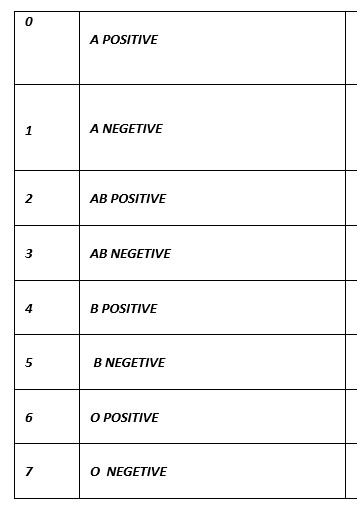

In [96]:
from sklearn.preprocessing import OneHotEncoder
  

In [97]:
df['Gender']= df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df['Gender']


0      0
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     0
14     0
15     1
16     0
17     1
18     0
19     0
20     0
21     1
22     1
23     0
24     1
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     0
44     0
45     0
46     1
47     0
48     0
49     0
50     0
51     0
52     0
53     1
54     1
55     1
56     1
57     1
58     0
59     0
60     1
61     1
62     0
63     1
64     0
65     0
66     1
67     0
68     0
69     0
70     1
71     0
72     1
73     1
74     0
75     0
76     0
77     0
78     1
79     1
80     1
81     1
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     0
90     0
91     1
92     1
93     1
94     0
95     1
96     0
97     0
98     1
99     0
100    0
101    0
102    0
103    1
104    1
105    1
106    1
107    1
108    1
109    0
110    0
1

<font color="green"> encode the data for easier training for the model</font>

In [98]:
label_encoder2 = preprocessing.LabelEncoder()

In [99]:
df['Your Age'] = label_encoder2.fit_transform(df['Your Age'])
  
df['Your Age'].unique()

encoded_labelss2 = df['Your Age'].unique()

original_labels2 = label_encoder2.inverse_transform(encoded_labelss2)

for ty in range(0,5):
    print(encoded_labelss2[ty]," : ",original_labels2[ty])

0  :  19-25
1  :  25-35
4  :  below 18
2  :  35+
3  :  50+


new_dff

0  :  A+ve
4  :  B+ve
7  :  O-VE
5  :  B-ve
6  :  O+ve
2  :  AB+ve
1  :  A-ve
3  :  AB-

In [100]:
def fill_Dmatch(df):#can recieve blood from
    dmatch_data = []
    for i in range(0, 254):
        
        if df.loc[i, 'Your Blood Group'] == 0:  # A positive
            dmatch_data.append([0, 1, 6, 7])
            
        elif df.loc[i, 'Your Blood Group'] == 1:  # A negative
            dmatch_data.append([1, 7])
            
        elif df.loc[i, 'Your Blood Group'] == 2:  # AB positive
            dmatch_data.append([0, 1, 2, 3, 4, 5, 6, 7])
            
        elif df.loc[i, 'Your Blood Group'] == 3:  # AB negative
            dmatch_data.append([1, 3, 5, 7])
            
        elif df.loc[i, 'Your Blood Group'] == 4:  # B positive
            dmatch_data.append([4, 5, 6, 7])
            
        elif df.loc[i, 'Your Blood Group'] == 5:  # B negative
            dmatch_data.append([5, 7])
            
            
        elif df.loc[i, 'Your Blood Group'] == 6:  # O positive
            dmatch_data.append([6, 7])
            
        elif df.loc[i, 'Your Blood Group'] == 7:  # O negative
            dmatch_data.append([7])
        else:
            dmatch_data.append(None)  # Handle other cases if needed

    df['Dmatch'] = dmatch_data
    return df


In [101]:
fill_Dmatch(df)

Timestamp  DONOUR UID  Your Age  Gender  Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0         0       0                 0   
1    7/13/2023 18:25:09     2535BP1         1       0                 4   
2    7/13/2023 18:28:45     2535ON2         1       0                 7   
3    7/13/2023 18:34:21     2535BN3         1       0                 5   
4    7/13/2023 18:34:36     1925OP4         0       1                 6   
5    7/13/2023 18:39:26     1925BP5         0       1                 4   
6    7/13/2023 18:40:24       18OP6         4       1                 6   
7    7/13/2023 18:41:45     2535BP7         1       1                 4   
8    7/13/2023 18:43:47     1925AP8         0       0                 0   
9    7/13/2023 18:44:39    1925ABP9         0       0                 2   
10   7/13/2023 18:45:23    2535AP10         1       0                 0   
11   7/13/2023 18:46:08    1925OP11         0       0                 6   
12   7/13/2023 18:46:09      18OP12         4       1                 6   
13   7/13/2023 18:46:56    1925BP13         0       0                 4   
14   7/13/2023 18:47:34    1925BP14         0       0                 4   
15   7/13/2023 18:48:59    1925AP15         0       1                 0   
16   7/13/2023 18:50:34    1925OP16         0       0                 6   
17   7/13/2023 18:52:08      35AP17         2       1                 0   
18   7/13/2023 18:52:26    1925BP18         0       0                 4   
19   7/13/2023 18:53:07    1925BP19         0       0                 4   
20   7/13/2023 18:55:44      35OP20         2       0                 6   
21   7/13/2023 18:56:52      50BP21         3       1                 4   
22   7/13/2023 18:58:18      35AP22         2       1                 0   
23   7/13/2023 18:58:50    1925OP23         0       0                 6   
24   7/13/2023 18:59:22    2535AP24         1       1                 0   
25   7/13/2023 19:05:01      35OP25         2       0                 6   
26   7/13/2023 19:06:07    1925OP26         0       0                 6   
27   7/13/2023 19:08:31    1925OP27         0       0                 6   
28   7/13/2023 19:09:03    1925AP28         0       0                 0   
29   7/13/2023 19:09:08    1925AP29         0       0                 0   
30   7/13/2023 19:12:36   1925ABP30         0       0                 2   
31   7/13/2023 19:12:51    1925OP31         0       0                 6   
32   7/13/2023 19:14:11    1925OP32         0       0                 6   
33   7/13/2023 19:15:51    1925BP33         0       0                 4   
34   7/13/2023 19:18:36      50OP34         3       0                 6   
35   7/13/2023 19:18:52    2535OP35         1       0                 6   
36   7/13/2023 19:19:38    1925OP36         0       0                 6   
37   7/13/2023 19:21:57    1925AP37         0       1                 0   
38   7/13/2023 19:24:30    1925OP38         0       1                 6   
39   7/13/2023 19:25:11    1925OP39         0       1                 6   
40   7/13/2023 19:29:36    2535BP40         1       0                 4   
41   7/13/2023 19:30:56     35ABP41         2       1                 2   
42   7/13/2023 19:32:34    2535OP42         1       1                 6   
43   7/13/2023 19:34:19    2535AP43         1       0                 0   
44   7/13/2023 19:36:47    1925ON44         0       0                 7   
45   7/13/2023 19:36:48    2535BP45         1       0                 4   
46   7/13/2023 19:37:40      35OP46         2       1                 6   
47   7/13/2023 19:40:38    2535OP47         1       0                 6   
48   7/13/2023 19:41:09    1925OP48         0       0                 6   
49   7/13/2023 19:42:47    1925OP49         0       0                 6   
50   7/13/2023 19:42:49    1925AP50         0       0                 0   
51   7/13/2023 19:43:09    1925OP51         0       0                 6   
52   7/13/2023 19:43:37    2535OP52    

In [102]:
def fill_Rmatch(df):#can donate blood to
    rmatch_data = []
    
    for i in range(0, 254):
        
        if df.loc[i, "Your Blood Group"] == 0:  # A positive
            rmatch_data.append([0, 2])
            
        elif df.loc[i, "Your Blood Group"] == 1:  # A negative
            rmatch_data.append([0, 1, 2, 3])
            
        elif df.loc[i, "Your Blood Group"] == 2:  # AB positive
            rmatch_data.append([2])
            
        elif df.loc[i, "Your Blood Group"] == 3:  # AB negative
            rmatch_data.append([2, 3])
            
        elif df.loc[i, "Your Blood Group"] == 4:  # B Positive
            rmatch_data.append([2, 4])
            
        elif df.loc[i, "Your Blood Group"] == 5:  # B negative
            rmatch_data.append([2, 3, 4, 5])
            
        elif df.loc[i, "Your Blood Group"] == 6:  # O positive
            rmatch_data.append([0, 2, 4, 6])
            
        elif df.loc[i, "Your Blood Group"] == 7:  # O negative
            rmatch_data.append([0, 1, 2, 3, 4, 5, 6, 7])
        else:
            rmatch_data.append(None)  # Handle other cases if needed

    df['Rmatch'] = rmatch_data
    return df


In [103]:
fill_Rmatch(df)

Timestamp  DONOUR UID  Your Age  Gender  Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0         0       0                 0   
1    7/13/2023 18:25:09     2535BP1         1       0                 4   
2    7/13/2023 18:28:45     2535ON2         1       0                 7   
3    7/13/2023 18:34:21     2535BN3         1       0                 5   
4    7/13/2023 18:34:36     1925OP4         0       1                 6   
5    7/13/2023 18:39:26     1925BP5         0       1                 4   
6    7/13/2023 18:40:24       18OP6         4       1                 6   
7    7/13/2023 18:41:45     2535BP7         1       1                 4   
8    7/13/2023 18:43:47     1925AP8         0       0                 0   
9    7/13/2023 18:44:39    1925ABP9         0       0                 2   
10   7/13/2023 18:45:23    2535AP10         1       0                 0   
11   7/13/2023 18:46:08    1925OP11         0       0                 6   
12   7/13/2023 18:46:09      18OP12         4       1                 6   
13   7/13/2023 18:46:56    1925BP13         0       0                 4   
14   7/13/2023 18:47:34    1925BP14         0       0                 4   
15   7/13/2023 18:48:59    1925AP15         0       1                 0   
16   7/13/2023 18:50:34    1925OP16         0       0                 6   
17   7/13/2023 18:52:08      35AP17         2       1                 0   
18   7/13/2023 18:52:26    1925BP18         0       0                 4   
19   7/13/2023 18:53:07    1925BP19         0       0                 4   
20   7/13/2023 18:55:44      35OP20         2       0                 6   
21   7/13/2023 18:56:52      50BP21         3       1                 4   
22   7/13/2023 18:58:18      35AP22         2       1                 0   
23   7/13/2023 18:58:50    1925OP23         0       0                 6   
24   7/13/2023 18:59:22    2535AP24         1       1                 0   
25   7/13/2023 19:05:01      35OP25         2       0                 6   
26   7/13/2023 19:06:07    1925OP26         0       0                 6   
27   7/13/2023 19:08:31    1925OP27         0       0                 6   
28   7/13/2023 19:09:03    1925AP28         0       0                 0   
29   7/13/2023 19:09:08    1925AP29         0       0                 0   
30   7/13/2023 19:12:36   1925ABP30         0       0                 2   
31   7/13/2023 19:12:51    1925OP31         0       0                 6   
32   7/13/2023 19:14:11    1925OP32         0       0                 6   
33   7/13/2023 19:15:51    1925BP33         0       0                 4   
34   7/13/2023 19:18:36      50OP34         3       0                 6   
35   7/13/2023 19:18:52    2535OP35         1       0                 6   
36   7/13/2023 19:19:38    1925OP36         0       0                 6   
37   7/13/2023 19:21:57    1925AP37         0       1                 0   
38   7/13/2023 19:24:30    1925OP38         0       1                 6   
39   7/13/2023 19:25:11    1925OP39         0       1                 6   
40   7/13/2023 19:29:36    2535BP40         1       0                 4   
41   7/13/2023 19:30:56     35ABP41         2       1                 2   
42   7/13/2023 19:32:34    2535OP42         1       1                 6   
43   7/13/2023 19:34:19    2535AP43         1       0                 0   
44   7/13/2023 19:36:47    1925ON44         0       0                 7   
45   7/13/2023 19:36:48    2535BP45         1       0                 4   
46   7/13/2023 19:37:40      35OP46         2       1                 6   
47   7/13/2023 19:40:38    2535OP47         1       0                 6   
48   7/13/2023 19:41:09    1925OP48         0       0                 6   
49   7/13/2023 19:42:47    1925OP49         0       0                 6   
50   7/13/2023 19:42:49    1925AP50         0       0                 0   
51   7/13/2023 19:43:09    1925OP51         0       0                 6   
52   7/13/2023 19:43:37    2535OP52    

<h3>DONOR SCORE ESTIMATION:</h3>
    <font color="red"> </font>

In [104]:
def calculate_starr(row):
    
    donor_rating = row['Donor Rating']
    
    last_donation = row['When did you last donated\nthe blood']  
    
    planning_to_donate = row['when are you planning to donate your blood ?\n']  
    
    times_donated = row['How many times have u donated blood till now?\n']
    
    if donor_rating != 0 and last_donation != "less than a month":
        
        if planning_to_donate == "within few months":
            
            if times_donated in ["more than 3 times", "2-3 times", "1 time"]:
                return 5
            
            elif times_donated == "not donated":
                return 4
            
        elif planning_to_donate == "may be after an year":
            if times_donated == "more than 3 times":
                return 4
            
            elif times_donated in ["2-3 times", "1 time"]:
                return 3
            
            elif times_donated == "not donated":
                return 2
            
        elif planning_to_donate == "never":
            return 0
    
    return 1

def star_D(df):
    for i in range(0, 254):  
        row = df.loc[i]
        df.loc[i, 'Starr'] = calculate_starr(row)
    
    return df


In [105]:
star_D(df)

Timestamp  DONOUR UID  Your Age  Gender  Your Blood Group  \
0    7/13/2023 18:22:49     1925AP0         0       0                 0   
1    7/13/2023 18:25:09     2535BP1         1       0                 4   
2    7/13/2023 18:28:45     2535ON2         1       0                 7   
3    7/13/2023 18:34:21     2535BN3         1       0                 5   
4    7/13/2023 18:34:36     1925OP4         0       1                 6   
5    7/13/2023 18:39:26     1925BP5         0       1                 4   
6    7/13/2023 18:40:24       18OP6         4       1                 6   
7    7/13/2023 18:41:45     2535BP7         1       1                 4   
8    7/13/2023 18:43:47     1925AP8         0       0                 0   
9    7/13/2023 18:44:39    1925ABP9         0       0                 2   
10   7/13/2023 18:45:23    2535AP10         1       0                 0   
11   7/13/2023 18:46:08    1925OP11         0       0                 6   
12   7/13/2023 18:46:09      18OP12         4       1                 6   
13   7/13/2023 18:46:56    1925BP13         0       0                 4   
14   7/13/2023 18:47:34    1925BP14         0       0                 4   
15   7/13/2023 18:48:59    1925AP15         0       1                 0   
16   7/13/2023 18:50:34    1925OP16         0       0                 6   
17   7/13/2023 18:52:08      35AP17         2       1                 0   
18   7/13/2023 18:52:26    1925BP18         0       0                 4   
19   7/13/2023 18:53:07    1925BP19         0       0                 4   
20   7/13/2023 18:55:44      35OP20         2       0                 6   
21   7/13/2023 18:56:52      50BP21         3       1                 4   
22   7/13/2023 18:58:18      35AP22         2       1                 0   
23   7/13/2023 18:58:50    1925OP23         0       0                 6   
24   7/13/2023 18:59:22    2535AP24         1       1                 0   
25   7/13/2023 19:05:01      35OP25         2       0                 6   
26   7/13/2023 19:06:07    1925OP26         0       0                 6   
27   7/13/2023 19:08:31    1925OP27         0       0                 6   
28   7/13/2023 19:09:03    1925AP28         0       0                 0   
29   7/13/2023 19:09:08    1925AP29         0       0                 0   
30   7/13/2023 19:12:36   1925ABP30         0       0                 2   
31   7/13/2023 19:12:51    1925OP31         0       0                 6   
32   7/13/2023 19:14:11    1925OP32         0       0                 6   
33   7/13/2023 19:15:51    1925BP33         0       0                 4   
34   7/13/2023 19:18:36      50OP34         3       0                 6   
35   7/13/2023 19:18:52    2535OP35         1       0                 6   
36   7/13/2023 19:19:38    1925OP36         0       0                 6   
37   7/13/2023 19:21:57    1925AP37         0       1                 0   
38   7/13/2023 19:24:30    1925OP38         0       1                 6   
39   7/13/2023 19:25:11    1925OP39         0       1                 6   
40   7/13/2023 19:29:36    2535BP40         1       0                 4   
41   7/13/2023 19:30:56     35ABP41         2       1                 2   
42   7/13/2023 19:32:34    2535OP42         1       1                 6   
43   7/13/2023 19:34:19    2535AP43         1       0                 0   
44   7/13/2023 19:36:47    1925ON44         0       0                 7   
45   7/13/2023 19:36:48    2535BP45         1       0                 4   
46   7/13/2023 19:37:40      35OP46         2       1                 6   
47   7/13/2023 19:40:38    2535OP47         1       0                 6   
48   7/13/2023 19:41:09    1925OP48         0       0                 6   
49   7/13/2023 19:42:47    1925OP49         0       0                 6   
50   7/13/2023 19:42:49    1925AP50         0       0                 0   
51   7/13/2023 19:43:09    1925OP51         0       0                 6   
52   7/13/2023 19:43:37    2535OP52    

<font color="red">Now we have all the essential for matching the donour with the recipient</font>

<font color="red">first we need to extract certain columns from data frame </font>

In [106]:
match_columns = ['DONOUR UID','Donor Rating','Your Blood Group','Rmatch','Starr']
mdf = df[match_columns].copy()

In [107]:
mdf

DONOUR UID  Donor Rating  Your Blood Group                    Rmatch  \
0       1925AP0           0.0                 0                    [0, 2]   
1       2535BP1           1.0                 4                    [2, 4]   
2       2535ON2           1.0                 7  [0, 1, 2, 3, 4, 5, 6, 7]   
3       2535BN3           1.0                 5              [2, 3, 4, 5]   
4       1925OP4           1.0                 6              [0, 2, 4, 6]   
5       1925BP5           1.0                 4                    [2, 4]   
6         18OP6           0.0                 6              [0, 2, 4, 6]   
7       2535BP7           1.0                 4                    [2, 4]   
8       1925AP8           0.0                 0                    [0, 2]   
9      1925ABP9           0.0                 2                       [2]   
10     2535AP10           1.0                 0                    [0, 2]   
11     1925OP11           0.0                 6              [0, 2, 4, 6]   
12       18OP12           0.0                 6              [0, 2, 4, 6]   
13     1925BP13           0.0                 4                    [2, 4]   
14     1925BP14           0.0                 4                    [2, 4]   
15     1925AP15           0.0                 0                    [0, 2]   
16     1925OP16           0.0                 6              [0, 2, 4, 6]   
17       35AP17           1.0                 0                    [0, 2]   
18     1925BP18           0.0                 4                    [2, 4]   
19     1925BP19           0.0                 4                    [2, 4]   
20       35OP20           1.0                 6              [0, 2, 4, 6]   
21       50BP21           0.0                 4                    [2, 4]   
22       35AP22           0.0                 0                    [0, 2]   
23     1925OP23           0.0                 6              [0, 2, 4, 6]   
24     2535AP24           0.0                 0                    [0, 2]   
25       35OP25           0.0                 6              [0, 2, 4, 6]   
26     1925OP26           0.0                 6              [0, 2, 4, 6]   
27     1925OP27           0.0                 6              [0, 2, 4, 6]   
28     1925AP28           1.0                 0                    [0, 2]   
29     1925AP29           0.0                 0                    [0, 2]   
30    1925ABP30           0.0                 2                       [2]   
31     1925OP31           0.0                 6              [0, 2, 4, 6]   
32     1925OP32           0.0                 6              [0, 2, 4, 6]   
33     1925BP33           1.0                 4                    [2, 4]   
34       50OP34           0.0                 6              [0, 2, 4, 6]   
35     2535OP35           1.0                 6              [0, 2, 4, 6]   
36     1925OP36           0.0                 6              [0, 2, 4, 6]   
37     1925AP37           1.0                 0                    [0, 2]   
38     1925OP38           1.0                 6              [0, 2, 4, 6]   
39     1925OP39           0.0                 6              [0, 2, 4, 6]   
40     2535BP40           1.0                 4                    [2, 4]   
41      35ABP41           0.0                 2                       [2]   
42     2535OP42           1.0                 6              [0, 2, 4, 6]   
43     2535AP43           1.0                 0                    [0, 2]   
44     1925ON44           0.0                 7  [0, 1, 2, 3, 4, 5, 6, 7]   
45     2535BP45           1.0                 4                    [2, 4]   
46       35OP46           1.0                 6              [0, 2, 4, 6]   
47     2535OP47           1.0                 6              [0, 2, 4, 6]   
48     1925OP48           1.0                 6              [0, 2, 4, 6]   
49     1925OP49           0.0                 6              [0, 2, 4, 6]   
50     1925AP50           0.0                 0                    [0, 2]   
5

In [108]:
# rmatch-> can donate blood to


In [109]:


from IPython.display import display, HTML

def colored_text(text, color):
    
    return f'<span style="color:{color}">{text}</span>'


In [110]:
def crimson_match_specific(df, Rbg,Plc):
    
    result = ""  

    for i in range(len(df)):  
        
        if Rbg in df.loc[i, 'Rmatch'] and df.loc[i, 'Donor Rating'] != 0 and df.loc[i,'POR']==Plc:
            
            donor_uid = df.loc[i, 'DONOUR UID']
            
            blood_group = df.loc[i, 'ybg']
            
            donor_rating = df.loc[i, 'Starr']
            
            donor_POR = df.loc[i, 'POR']
            
            e_id = df.loc[i, 'Email Address']

            if df.loc[i, 'Starr'] == 5 or df.loc[i, 'Starr'] == 4:
                
                result += f"Donor UID: {donor_uid} ---\t--- Donour Blood Group: {blood_group} ---\t---Donour star Rating: {donor_rating} ---\t---Place: {donor_POR} ------\n\nContact: {e_id}\n\n"
            else:
                result += f"Donor UID: {donor_uid} --- \t--- Donour Blood Group: {blood_group} ---\t---Donour star Rating: {donor_rating} ---\t---Place: {donor_POR} ------\n\nContact: {e_id}\n\n"

    return result


In [111]:
def crimson_match_all(df, Rbg):
    
    result = ""  

    for i in range(len(df)):  
        
        if Rbg in df.loc[i, 'Rmatch'] and df.loc[i, 'Donor Rating'] != 0:
            
            donor_uid = df.loc[i, 'DONOUR UID']
            
            blood_group = df.loc[i, 'ybg']
            
            donor_rating = df.loc[i, 'Starr']
            
            donor_POR = df.loc[i, 'POR']
            
            e_id = df.loc[i, 'Email Address']

            if df.loc[i, 'Starr'] == 5 or df.loc[i, 'Starr'] == 4:
                
                result += f"Donor UID: {donor_uid} ---\t---Donour Blood Group:{blood_group} ---\t---Donour star Rating: {donor_rating} ---\t---Place:{donor_POR} ------\n\nContact: {e_id}\n\n"
            else:
                result += f"Donor UID: {donor_uid} ---\t---Donour Blood Group: {blood_group} ---\t---Donour star Rating: {donor_rating} ---\t---Place: {donor_POR} ------\n\nContact: {e_id}\n\n"

    return result


In [ ]:
from csv import *
from tkinter import *
from tkinter import messagebox
import tkinter as tk
from tkinter import ttk
import joblib
import numpy as np

mj = joblib.load('Rmodel_joblib')


class Window1:
    def __init__(self, master):
        self.master = master
        self.master.title("Receiver")
        self.master.geometry("500x400")

        # Set the background color
        self.background_color = "lightblue"
        self.master.configure(bg=self.background_color)

        # Create a custom style for ttk widgets
        self.custom_style = ttk.Style()
        self.custom_style.configure("Custom.TLabel", font=("Helvetica", 12), background=self.background_color)
        self.custom_style.configure("Custom.TEntry", font=("Helvetica", 12))
        self.custom_style.configure("Custom.TRadiobutton", font=("Helvetica", 12))
        self.custom_style.configure("Custom.TButton", font=("Helvetica", 12))

        # Labels
        self.label1 = ttk.Label(self.master, text="Name:", style="Custom.TLabel")
        self.label2 = ttk.Label(self.master, text="Age:", style="Custom.TLabel")
        self.label31 = ttk.Label(self.master, text="Gender:", style="Custom.TLabel")
        self.label32 = ttk.Label(self.master, text="Receiver's Blood Group:", style="Custom.TLabel")
        self.label4 = ttk.Label(self.master, text="Place:", style="Custom.TLabel")

        # Entry Fields
        self.name = ttk.Entry(self.master, width=30, style="Custom.TEntry")
        self.age = ttk.Entry(self.master, width=30, style="Custom.TEntry")

        # Radio Buttons
        self.gender = tk.StringVar()
        self.gender.set("Male")  # Default selection

        self.radio_male = ttk.Radiobutton(self.master, text="Male", variable=self.gender, value="Male", style="Custom.TRadiobutton")
        self.radio_female = ttk.Radiobutton(self.master, text="Female", variable=self.gender, value="Female", style="Custom.TRadiobutton")

        self.var1 = tk.IntVar()

        def on_radio_selected():
            Rbg = self.var1.get()
            return Rbg

        self.radio_a_pos = ttk.Radiobutton(self.master, text="A +ve", variable=self.var1, value=0, style="Custom.TRadiobutton", command=on_radio_selected)
        self.radio_a_neg = ttk.Radiobutton(self.master, text="A -ve", variable=self.var1, value=1, style="Custom.TRadiobutton", command=on_radio_selected)
        self.radio_ab_pos = ttk.Radiobutton(self.master, text="AB +ve", variable=self.var1, value=2, style="Custom.TRadiobutton", command=on_radio_selected)
        self.radio_ab_neg = ttk.Radiobutton(self.master, text="AB -ve", variable=self.var1, value=3, style="Custom.TRadiobutton", command=on_radio_selected)
        self.radio_b_pos = ttk.Radiobutton(self.master, text="B +ve", variable=self.var1, value=4, style="Custom.TRadiobutton", command=on_radio_selected)
        self.radio_b_neg = ttk.Radiobutton(self.master, text="B -ve", variable=self.var1, value=5, style="Custom.TRadiobutton", command=on_radio_selected)
        self.radio_o_pos = ttk.Radiobutton(self.master, text="O +ve", variable=self.var1, value=6, style="Custom.TRadiobutton", command=on_radio_selected)
        self.radio_o_neg = ttk.Radiobutton(self.master, text="O -ve", variable=self.var1, value=7, style="Custom.TRadiobutton", command=on_radio_selected)

        # Dropdown (OptionMenu)
        self.options = tk.StringVar()
        self.options.set("Include all places")
        self.dropdown = ttk.OptionMenu(self.master, self.options, 'Include all places', 'Bengaluru Rural', 'Bengaluru Urban', 'Chikkamagaluru', 'Dakshina Kannada', 'Hassan', 'Kodagu', 'Mysuru', 'Raichuru', 'Shivamogga', 'Ballari', style="Custom.TButton")
        def Clear():
            self.name.delete(0, END)
            self.age.delete(0, END)
            self.height.delete(0, END)
            self.weight.delete(0, END)

        # Buttons
        self.check_button = ttk.Button(self.master, text="Check", command=self.on_check_button, style="Custom.TButton")
        self.clear_button = ttk.Button(self.master, text="Clear", command=lambda: self.result_label.config(text=""), style="Custom.TButton")
        self.exit_button = ttk.Button(self.master, text="Exit", command=self.master.quit, style="Custom.TButton")

        # Result Label (to display the entered data)
        self.result_label = ttk.Label(self.master, padding=(10, 5), justify=tk.LEFT, font=("Helvetica", 12), background=self.background_color)

        # Grid Layout
        self.label1.grid(row=0, column=0, padx=10, pady=5, sticky=tk.W)
        self.label2.grid(row=1, column=0, padx=10, pady=5, sticky=tk.W)
        self.label31.grid(row=2, column=0, padx=10, pady=5, sticky=tk.W)
        self.label32.grid(row=3, column=0, padx=10, pady=5, sticky=tk.W)
        self.label4.grid(row=7, column=0, padx=10, pady=5, sticky=tk.W)

        self.name.grid(row=0, column=1, padx=10, pady=5, sticky=tk.W)
        self.age.grid(row=1, column=1, padx=10, pady=5, sticky=tk.W)

        self.radio_male.grid(row=2, column=1, padx=10, pady=5, sticky=tk.W)
        self.radio_female.grid(row=2, column=2, padx=10, pady=5, sticky=tk.W)

        self.radio_a_pos.grid(row=3, column=1, padx=10, pady=5, sticky=tk.W)
        self.radio_a_neg.grid(row=4, column=1, padx=10, pady=5, sticky=tk.W)
        self.radio_ab_pos.grid(row=5, column=1, padx=10, pady=5, sticky=tk.W)
        self.radio_ab_neg.grid(row=6, column=1, padx=10, pady=5, sticky=tk.W)
        self.radio_b_pos.grid(row=3, column=2, padx=10, pady=5, sticky=tk.W)
        self.radio_b_neg.grid(row=4, column=2, padx=10, pady=5, sticky=tk.W)
        self.radio_o_pos.grid(row=5, column=2, padx=10, pady=5, sticky=tk.W)
        self.radio_o_neg.grid(row=6, column=2, padx=10, pady=5, sticky=tk.W)

        self.dropdown.grid(row=8, column=1, padx=10, pady=5, sticky=tk.W)

        self.check_button.grid(row=8, column=0, columnspan=2, padx=10, pady=10, sticky=tk.W)
        self.clear_button.grid(row=10, column=0, columnspan=2, padx=10, pady=10, sticky=tk.W)
        self.exit_button.grid(row=11, column=0, columnspan=2, padx=10, pady=10, sticky=tk.W)

        self.result_label.grid(row=8, column=2, rowspan=4, padx=10, pady=5, sticky=tk.W)

    def on_check_button(self):
        Rbg = self.on_radio_selected()
        selected_place = self.options.get()

        if selected_place == "Include all places":
            result = crimson_match_all(df, Rbg)
        else:
            result = crimson_match_specific(df, Rbg, selected_place)

        result_window = tk.Toplevel(self.master)
        result_window.title("Donor List")

        # Create a large Text widget in the new window to display the result
        result_text = tk.Text(result_window, wrap=tk.WORD, font=("Helvetica", 10), width=100, height=50)
        result_text.insert(tk.END, result)
        result_text.pack()

    def on_radio_selected(self):
        Rbg = self.var1.get()
        return Rbg


class Window2:
    def __init__(self, master):
        self.master = master
        self.master.title("Donor Window")
        self.master.geometry("400x1000")

        mainlist = []
        self.var1 = StringVar()
        self.var2 = StringVar()
        self.var3 = StringVar()
        self.var4 = StringVar()
        self.var5 = StringVar()
        self.var6 = StringVar()
        self.var7 = StringVar()
        self.var8 = StringVar()
        self.var9 = StringVar()
        self.var10 = StringVar()
        self.var11 = StringVar()

        def BMI_cal1(Dh, Dw):
            Dhf = Dh * 0.01
            Dhf2 = Dhf * Dhf
            BMi = Dw / Dhf2
            return BMi

        def encodingg_values(DA, Dh, Dw, DD):
            if DA <= 18:
                d_age = 0
            elif DA > 18 and DA <= 100:
                d_age = 1
            else:
                print("Invalid")

            DBmi = BMI_cal1(Dh, Dw)

            if DBmi < 18.5:
                d_bmi = 0
            else:
                d_bmi = 1

            if DD == 1:
                d_p = 1
            else:
                d_p = 0

            return d_age, d_bmi, d_p
        
        

        def Add():
            lst = [self.name.get(), self.age.get(), self.height.get(), self.weight.get()]
            if self.var1.get() == "Asthama":
                lst.append(self.var1.get())
            if self.var2.get() == "Diabetes":
                lst.append(self.var2.get())
            if self.var3.get() == "High Blood Pressure":
                lst.append(self.var3.get())
            if self.var4.get() == "Low Blood Pressure":
                lst.append(self.var4.get())
            if self.var5.get() == "allergic towards something specific":
                lst.append(self.var5.get())
            if self.var6.get() == "Cancer":
                lst.append(self.var6.get())
            if self.var7.get() == "obesity":
                lst.append(self.var7.get())
            if self.var8.get() == "nutrient deficiency":
                lst.append(self.var8.get())
            if self.var9.get() == "hemoglobin deficiency":
                lst.append(self.var9.get())
            if self.var10.get() == "other serious disease, i prefer not to specify":
                lst.append(self.var10.get())
            if self.var11.get() == "no , i am healthy":
                lst.append(self.var11.get())
            mainlist.append(lst)

            messagebox.showinfo("Notification", "The data has been added successfully")

        def Check():
            DA = int(self.age.get())
            Dh = int(self.height.get())
            Dw = int(self.weight.get())
            if self.var2.get() == "Diabetes" or self.var3.get() == "High Blood Pressure" or self.var4.get() == "Low Blood Pressure" or self.var6.get() == "Cancer" or self.var8.get() == "nutrient deficiency" or self.var9.get() == "hemoglobin deficiency" or self.var10.get() == "other serious disease, i prefer not to specify":
                DD = 1
            else:
                DD = 0
            aa = encodingg_values(DA, Dh, Dw, DD)
            d1 = aa[0]
            d2 = aa[1]
            d3 = aa[2]
            if mj.predict([[d1, d2, d3]]) <= 0.92:
                messagebox.showinfo("Notification", "You cannot donate blood")
            else:
                messagebox.showinfo("Notification", "You can donate blood")

        def Save():
            with open("file.csv", "a") as file:
                donour = writer(file)
                donour.writerow(["Name", "Age", "Your Height", "Your Weight", "Mention the Diseases"])
                donour.writerows(mainlist)
                messagebox.showinfo("Notification", "The data has been saved successfully")

        def Clear():
            self.name.delete(0, END)
            self.age.delete(0, END)
            self.height.delete(0, END)
            self.weight.delete(0, END)

        self.label1 = Label(self.master, text="Name: ", padx=20, pady=10)
        self.label2 = Label(self.master, text="Age: ", padx=20, pady=10)
        self.label31 = Label(self.master, text="Your Height: ", padx=20, pady=10)
        self.label32 = Label(self.master, text="Your Weight: ", padx=20, pady=10)
        self.label4 = Label(self.master, text="Do you have any disease?: ", padx=20, pady=10)

        self.name = Entry(self.master, width=30, borderwidth=5)
        self.age = Entry(self.master, width=30, borderwidth=5)
        self.height = Entry(self.master, width=30, borderwidth=5)
        self.weight = Entry(self.master, width=30, borderwidth=5)

        self.save = Button(self.master, text="Save", padx=22, pady=10, command=Save)
        self.check = Button(self.master, text="Check", padx=20, pady=10, command=Check)
        self.add = Button(self.master, text="Add", padx=22, pady=10, command=Add)
        self.clear = Button(self.master, text="Clear", padx=20, pady=10, command=Clear)
        self.exit = Button(self.master, text="Exit", padx=60, pady=40, command=self.master.quit)
        self.label1.grid(row=0,column=0)
        self.label2.grid(row=1,column=0)
        self.label31.grid(row=2,column=0)
        self.label32.grid(row=3,column=0)
        self.label4.grid(row=4,column=0)
        
        self.name.grid(row=0,column=1)
        self.age.grid(row=1,column=1)
        self.height.grid(row=2,column=1)
        self.weight.grid(row=3,column=1)

        Checkbutton(self.master, text="Asthama", variable=self.var1, onvalue='Asthama', offvalue='').grid(row=5, column=1)
        Checkbutton(self.master, text="Diabetes", variable=self.var2, onvalue='Diabetes', offvalue='').grid(row=5, column=1)
        Checkbutton(self.master, text="High Blood Pressure", variable=self.var3, onvalue='High Blood Pressure', offvalue='').grid(row=7, column=1)
        Checkbutton(self.master, text="Low Blood Pressure", variable=self.var4, onvalue='Low Blood Pressure', offvalue='').grid(row=8, column=1)
        Checkbutton(self.master, text="allergic towards something specific", variable=self.var5, onvalue='allergic towards something specific', offvalue='').grid(row=9, column=1)
        Checkbutton(self.master, text="Cancer", variable=self.var6, onvalue='Cancer', offvalue='').grid(row=10, column=1)
        Checkbutton(self.master, text="obesity", variable=self.var7, onvalue='obesity', offvalue='').grid(row=11, column=1)
        Checkbutton(self.master, text="nutrient deficiency", variable=self.var8, onvalue='nutrient deficiency', offvalue='').grid(row=12, column=1)
        Checkbutton(self.master, text="hemoglobin deficiency", variable=self.var9, onvalue='hemoglobin deficiency', offvalue='').grid(row=13, column=1)
        Checkbutton(self.master, text="other serious disease, i prefer not to specify", variable=self.var10, onvalue='other serious disease, i prefer not to specify', offvalue='').grid(row=14, column=1)
        Checkbutton(self.master, text="no , i am healthy", variable=self.var11, onvalue='no , i am healthy', offvalue='').grid(row=15, column=1)

        self.save.grid(row=18, column=1, columnspan=2)
        self.check.grid(row=17, column=1, columnspan=2)
        self.add.grid(row=18, column=0, columnspan=2)
        self.clear.grid(row=17, column=0, columnspan=2)
        self.exit.grid(row=17, column=0, rowspan=3)


class MainWindow:
    def __init__(self, master):
        self.master = master
        self.master.title("CRIMSON-LIFELINER")
        self.master.geometry("400x200")
        background_color = "#FFCCCC"
        self.master.configure(bg=background_color)

        self.window1_button = Button(master, text="Reciever->", command=self.open_window1)
        self.window2_button = Button(master, text="Donour->", command=self.open_window2)

        self.window1_button.pack(pady=20)
        self.window2_button.pack(pady=20)

    def open_window1(self):
        window1 = Toplevel(self.master)
        Window1(window1)

    def open_window2(self):
        window2 = Toplevel(self.master)
        Window2(window2)


if __name__ == "__main__":
    root = Tk()
    main_window = MainWindow(root)
    root.mainloop()

    
    
